# Instacart EDA

In this notebook we will perform an exploratory data analysis in order to be able to identify interesting patterns and to be able to get to know our data.

In [51]:
import matplotlib.pyplot as plt
import pandas as pd
from processing import *
from tools import *
from modeling import *
from feature_extraction import *
from os import path


In [52]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [53]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 7]

The objective of this notebook is to perform an exploratory data analysis on the dataset provided by [Instacart](https://www.instacart.com/). [The Instacart Online Grocery Shopping Dataset 2017](https://www.instacart.com/datasets/grocery-shopping-2017) is used. The exploratory analysis is performed with the objective of evaluating the possibility of predicting shopping lists for users. 

<!-- We will explore the dataset and at the same time attempt to achieve the mentioned objective using traditional statistics.  -->

## Data

Let's have a look at the different dataframes that are available.

### Aisles

This dataset represents the different Aisles under which the products are organized.

```
aisles (134 rows):

- aisle_id: aisle identifier
- aisle: the name of the aisle
```

<!-- ![Screen%20Shot%202019-12-02%20at%203.43.12%20PM.png](attachment:Screen%20Shot%202019-12-02%20at%203.43.12%20PM.png) -->

Source : https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b

In [54]:
df_aisles = pd.read_csv('data/instacart_2017_05_01/aisles.csv')
df_aisles.info()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
aisle_id    134 non-null int64
aisle       134 non-null object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Observations:
- We have 134 different aisles

### Departments

This dataset represents the different departments under which the products are categorized.

```
deptartments (21 rows):

- department_id: department identifier
- department: the name of the department
```

<!-- ![Screen%20Shot%202019-12-02%20at%203.45.24%20PM.png](attachment:Screen%20Shot%202019-12-02%20at%203.45.24%20PM.png) -->

Source : https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b

In [55]:
df_departments = pd.read_csv('data/instacart_2017_05_01/departments.csv')
df_departments.head(10)
df_departments.info()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
department_id    21 non-null int64
department       21 non-null object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


Observations
- We have 21 different departments under which the products are categorized.

### Products

This dataset describes all the products that are available for purchase along with the corresponding ids to link each product with the corresponding aisle and department.

```
products (50k rows):

- product_id: product identifier
- product_name: name of the product
- aisle_id: foreign key
- department_id: foreign key
```

<!-- ![Screen%20Shot%202019-12-02%20at%2011.22.57%20AM.png](attachment:Screen%20Shot%202019-12-02%20at%2011.22.57%20AM.png) -->

Source : https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b

In [150]:
df_products = pd.read_csv('data/enhanced/df_products.csv')
df_products.head(10)
df_products.info()

,product_id,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded
0,1,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
1,2,All-Seasons Salt,104,13,4.0,90.0,allseasonssalt_2
2,3,Robust Golden Unsweetened Oolong Tea,94,7,6.0,277.0,robustgoldenunsweetenedoolongtea_3
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,22.0,329.0,smartonesclassicfavoritesminirigatoniwithvodka...
4,5,Green Chile Anytime Sauce,5,13,1.0,15.0,greenchileanytimesauce_5
5,6,Dry Nose Oil,11,11,NaN,8.0,drynoseoil_6
6,7,Pure Coconut Water With Orange,98,7,1.0,30.0,purecoconutwaterwithorange_7
7,8,Cut Russet Potatoes Steam N' Mash,116,1,13.0,165.0,cutrussetpotatoessteamnmash_8
8,9,Light Strawberry Blueberry Yogurt,120,16,5.0,156.0,lightstrawberryblueberryyogurt_9
9,10,Sparkling Orange Juice & Prickly Pear Beverage,115,7,119.0,2572.0,sparklingorangejuicepricklypearbeverage_10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49688 entries, 0 to 49687
Data columns (total 7 columns):
product_id                  49688 non-null int64
product_name                49688 non-null object
aisle_id                    49688 non-null int64
department_id               49688 non-null int64
orders_per_product_train    39123 non-null float64
orders_per_product_prior    49677 non-null float64
product_name_encoded        49688 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 2.7+ MB


<!-- Let's extract an alphabetically ordered list of the product names. This list will be used in the data processing sep in order to encode our product sequences into a binary vector space. 
# ordered_product_list = list(np.sort(df_products['product_name'].values))
# print(ordered_product_list[:10]) -->

In [57]:
df_products.groupby(['department_id']).agg(products_per_department=('product_id', 'count')).sort_values(by=['products_per_department'], ascending=False).reset_index().merge(df_departments, how='left', on='department_id')

,department_id,products_per_department,department
0,11,6563,personal care
1,19,6264,snacks
2,13,5371,pantry
3,7,4365,beverages
4,1,4007,frozen
5,16,3449,dairy eggs
6,17,3085,household
7,15,2092,canned goods
8,9,1858,dry goods pasta
9,4,1684,produce


Observations:
    - We have 49688 different products distributed among all the departments.
    - The department with more products if 'personal care' followed by 'snacks' and 'pantry'. (Table above)

### Orders

This dataframe contains data corresponding to the orders that have been places by our users.

```
orders (3.4m rows, 206k users):

- order_id: order identifier
- user_id: customer identifier
- eval_set: which evaluation set this order belongs in (see SET described below)
- order_number: the order sequence number for this user (1 = first, n = nth)
- order_dow: the day of the week the order was placed on
- order_hour_of_day: the hour of the day the order was placed on
- days_since_prior: days since the last order, capped at 30 (with NAs for order_number = 1)
```

<!-- ![Screen%20Shot%202019-12-02%20at%2010.38.38%20AM.png](attachment:Screen%20Shot%202019-12-02%20at%2010.38.38%20AM.png) -->

Source : https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b

In [58]:
df_orders = pd.read_csv('data/enhanced/df_orders.csv')
df_orders.head(10)
df_orders.info()
df_orders.describe()

/Users/lgarcia/opt/anaconda3/envs/ds-env/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences
0,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...
1,857644,69792,train,4,0,0,29.0,2016-04-01 00:00:00,13,organicavocado_47766 shreddedparmesan_4799 unc...
2,2379808,193128,train,4,6,0,0.0,2016-04-01 00:00:00,13,9paperplate_19779 classicmixvariety_19734
3,274779,35031,train,4,2,0,0.0,2016-04-01 00:00:00,13,schoolsafechocolatecupcakes_28489 organicwhole...
4,91799,62272,train,4,1,1,0.0,2016-04-01 01:00:00,13,organicwholewheatelbows_283 ripelargepittedoli...
5,2471774,121171,train,4,0,1,29.0,2016-04-01 01:00:00,13,banana_24852 boneinbeefribsteak_6849 wholegrai...
6,1269802,108970,train,4,0,2,29.0,2016-04-01 02:00:00,13,babycucumbers_8571 apples_13575 meyerlemons_24...
7,178198,165297,train,4,0,3,0.0,2016-04-01 03:00:00,13,dairyfreeunsweetenedcoconutmilk_29127 choppeds...
8,3346281,197032,train,4,0,4,29.0,2016-04-01 04:00:00,13,liquideggwhites_17902 organicbabyspinach_21903...
9,2170360,6397,train,4,4,4,0.0,2016-04-01 04:00:00,13,originalhotsauce_35898 organicextravirginolive...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 10 columns):
order_id                  int64
user_id                   int64
eval_set                  object
order_number              int64
order_dow                 int64
order_hour_of_day         int64
days_since_prior_order    float64
order_date                object
week_of_year              int64
product_sequences         object
dtypes: float64(1), int64(6), object(3)
memory usage: 261.0+ MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,week_of_year
count,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06,3.421083e+06
mean,1.710542e+06,1.029782e+05,1.715486e+01,2.776219e+00,1.345202e+01,1.044488e+01,3.485095e+01
std,9.875817e+05,5.953372e+04,1.773316e+01,2.046829e+00,4.226088e+00,9.308727e+00,1.445100e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
25%,8.552715e+05,5.139400e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00,2.200000e+01
50%,1.710542e+06,1.026890e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00,4.400000e+01
75%,2.565812e+06,1.543850e+05,2.300000e+01,5.000000e+00,1.600000e+01,1.500000e+01,4.500000e+01
max,3.421083e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,5.300000e+01


In [59]:
# Filter orders right away so code bellow is less verbose
df_orders_prior = df_orders.loc[df_orders['eval_set'] == 'prior']
df_orders_train = df_orders.loc[df_orders['eval_set'] == 'train']
df_orders_test = df_orders.loc[df_orders['eval_set'] == 'test']

In [60]:
print('Unique orders: {}'.format(df_orders['order_id'].nunique()))

Unique orders: 3421083


In [61]:
set_orders_prior = set(df_orders_prior['order_id'].values)
set_orders_train = set(df_orders_train['order_id'].values)
set_orders_test = set(df_orders_test['order_id'].values)

assert set_orders_prior.intersection(set_orders_train) == set()
assert set_orders_prior.intersection(set_orders_test) == set()
assert set_orders_train.intersection(set_orders_test) == set()

Observations:
- Each row represents one unique order. 
- Mean of 11.1 days since prior order. 
- Most orders happen around hour 13 (Mean of 13.4 order_hour_of_the_day)
- The prior, test and train sets are all disjoint (They have all different and unique order ids)
- The test orders dataframe has no related product ids, we can't construct sequences for it using df_order_products_train and df_order_products_prior


### Orders per product

There are two datasets provided that contain data corresponding to each order associated with the products that were in it. The dataset order_products__prior.csv contains the orders prior to that users' most recent order. The order_products__train.csv dataset contains the training data provided for the Kaggle challenge.

```
order_products__SET (30m+ rows):

- order_id: foreign key
- product_id: foreign key
- add_to_cart_order: order in which each product was added to cart
- reordered: 1 if this product has been ordered by this user in the past, 0 otherwise

where SET is one of the four following evaluation sets (eval_set in orders):

- "prior": orders prior to that users most recent order (~3.2m orders)
- "train": training data supplied to participants (~131k orders)

```

<!-- "test": test data reserved for machine learning competitions (~75k orders) -->
<!-- ![Screen%20Shot%202019-12-02%20at%203.51.29%20PM.png](attachment:Screen%20Shot%202019-12-02%20at%203.51.29%20PM.png) -->

Source : https://gist.github.com/jeremystan/c3b39d947d9b88b3ccff3147dbcf6c6b

#### Prior orders

In this dataset we can find the orders prior to the most recent order of each costumer. Let's see if we can understand 
our users' shopping habits more in depth by looking at this data.

In [62]:
df_order_products_prior = pd.read_csv('data/instacart_2017_05_01/order_products__prior.csv')
df_order_products_prior.head()
df_order_products_prior['reordered'].describe()
df_order_products_prior.loc[df_order_products_prior['order_id'] == 2]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


count    3.243449e+07
mean     5.896975e-01
std      4.918886e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: reordered, dtype: float64

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0


In [63]:
print('Shape of datset: {}'.format(df_order_products_prior.shape))
print('Unique orders: {}'.format(df_order_products_prior['order_id'].nunique()))
print('Ratio of products per order: {}'.format(df_order_products_prior.shape[0]/df_order_products_prior['order_id'].nunique()))

Shape of datset: (32434489, 4)
Unique orders: 3214874
Ratio of products per order: 10.088883421247614


Observations:
- 32434489 rows. Each row represents a product that was added to the cart and ended up in a purchase.
- 3214874 different orders
- We observe a overall reorder mean of 0.59, this tells us that that theres  a probability of 0.59 of users reordering items. We will break this down in more detail below.
- The orders are sequences where the order in which each product was added to the cart is given by 'add_to_cart_order'. We will extract these sequences later to learn from them
- We can join this dataset with the orders dataset in order to figure out which user placed each order. We will extract the sequences per user to learn a representation for each user. 

#### Training set

This dataset was provided as a 'training' dataset. Let's explore it a bit and compare it to the prior orders dataset so we understand how they relate. 

In [64]:
df_order_products_train = pd.read_csv('data/instacart_2017_05_01/order_products__train.csv')
df_order_products_train.head()
df_order_products_train['reordered'].describe()
df_order_products_train.loc[df_order_products_train['order_id'] == 1]

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


count    1.384617e+06
mean     5.985944e-01
std      4.901829e-01
min      0.000000e+00
25%      0.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: reordered, dtype: float64

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1


In [65]:
print('Shape of datset: {}'.format(df_order_products_train.shape))
print('Unique orders: {}'.format(df_order_products_train['order_id'].nunique()))
print('Ratio of products per order: {}'.format(df_order_products_prior.shape[0]/df_order_products_prior['order_id'].nunique()))

Shape of datset: (1384617, 4)
Unique orders: 131209
Ratio of products per order: 10.088883421247614


Observations:
- 1384617 rows. Each row represents a product that was added to the cart and ended up in a purchase.
- 131209 different orders
- We observe a overall reorder mean of 0.59, this tells us that that theres  a probability of 0.59 of users reordering items. We will break this down in more detail below.

#### How do these datasets compare?

In [66]:
tmp_group_order_id_train = df_order_products_train.merge(df_orders, how='left', on='order_id').reset_index()
unique_users_train = set(tmp_group_order_id_train['user_id'].unique())
print('Unique users for all orders in train: {}'.format(len(unique_users_train)))

tmp_group_order_id_prior = df_order_products_prior.merge(df_orders, how='left', on='order_id').reset_index()
unique_users_prior = set(tmp_group_order_id_prior['user_id'].unique())
print('Unique users for all orders in prior: {}'.format(len(unique_users_prior)))

users_not_in_train = unique_users_prior-unique_users_train
print('Number of users that are present in the prior dataframe but onot on the train: {}'.format(len(users_not_in_train)))

users_in_both = unique_users_prior | unique_users_train
print('Number of users that are present in both dataframes: {}'.format(len(users_in_both)))

Unique users for all orders in train: 131209
Unique users for all orders in prior: 206209
Number of users that are present in the prior dataframe but onot on the train: 75000
Number of users that are present in both dataframes: 206209


In [67]:
# list(users_in_both)[:10]
print('Prior orders order_number: {}'.format(np.sort(tmp_group_order_id_prior.loc[tmp_group_order_id_prior['user_id'] == 1]['order_number'].unique())))
print('Train orders order_number: {}'.format(np.sort(tmp_group_order_id_train.loc[tmp_group_order_id_train['user_id'] == 1]['order_number'].unique())))

Prior orders order_number: [ 1  2  3  4  5  6  7  8  9 10]
Train orders order_number: [11]


In [68]:
set_orders_products_prior = set(df_order_products_prior['order_id'].values)
set_orders_products_train = set(df_order_products_train['order_id'].values)

assert set_orders_test.intersection(set_orders_products_prior)  == set()
assert set_orders_test.intersection(set_orders_products_train) == set()

assert set_orders_train.intersection(set_orders_products_train) == set_orders_train
assert set_orders_prior.intersection(set_orders_products_prior) == set_orders_prior

Observations: 
- There is 75000 that are present in the prior orders data but not in the 'train' data.
- 206209 Unique users are present in both dataframes. this is the total number of users that we will be working with
- The train data contains the most recent order for each one of the users that are present in it. 
- The prior data contains all the prior orders to
- In the train dataset we have only one order per user.

Now this is some interesting information. The train dataset contains the most recent order for each user while the prior datset contains all the previous ones. It would make more sense to train any modeling approach based on the prior orders instead of the train data provided.

In [69]:
# Let's extract the number of total orders for both datasets so we can use it bellow if needed.
total_orders_train = df_order_products_train.shape[0]
print('Total orders in our training data: {}'.format(total_orders_train))

total_orders_prior = df_order_products_prior.shape[0]
print('Total orders in our prior data: {}'.format(total_orders_prior))

Total orders in our training data: 1384617
Total orders in our prior data: 32434489


## Analysis

Let the analysis begin! Let's use the datasets that were loaded above to see if we can answer some interesting questions and find relevant patterns.

### Understanding the Product Portfolio

Let's explore how our products distribute among 'departments' and 'aisles'. These two can be seen as a categorization of our product base. Bellow we will explore them quantitatively.

#### How many products are there in each department? 

Amout of products per department: 

Dtaframe shape: (21, 3) 



,department_id,product_count,department
0,11,6563,personal care
1,19,6264,snacks
2,13,5371,pantry
3,7,4365,beverages
4,1,4007,frozen
5,16,3449,dairy eggs
6,17,3085,household
7,15,2092,canned goods
8,9,1858,dry goods pasta
9,4,1684,produce


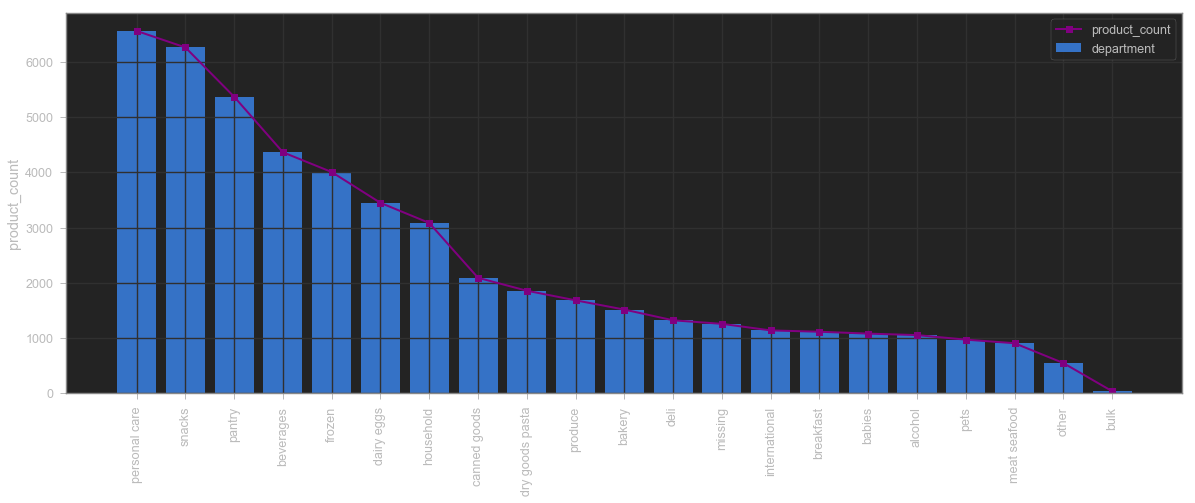

In [70]:
print('Amout of products per department: \n')
df_tmp = df_products.groupby(['department_id']).agg(product_count=('product_id', 'count')).reset_index().sort_values(by=['product_count'], ascending=False).merge(df_departments, how='left', on='department_id')
print('Dtaframe shape: {} \n'.format(df_tmp.shape))
df_tmp.head(10)
create_bar_chart(df_tmp['department'], df_tmp['product_count'], 'department', 'product_count')

#### How many products are there in each aisle? 

Amout of products per aisle: 

Dtaframe shape: (134, 3) 



,aisle_id,product_count,aisle
0,100,1258,missing
1,45,1246,candy chocolate
2,37,1091,ice cream ice
3,47,1038,vitamins supplements
4,120,1026,yogurt
5,107,989,chips pretzels
6,94,894,tea
7,21,891,packaged cheese
8,38,880,frozen meals
9,61,874,cookies cakes


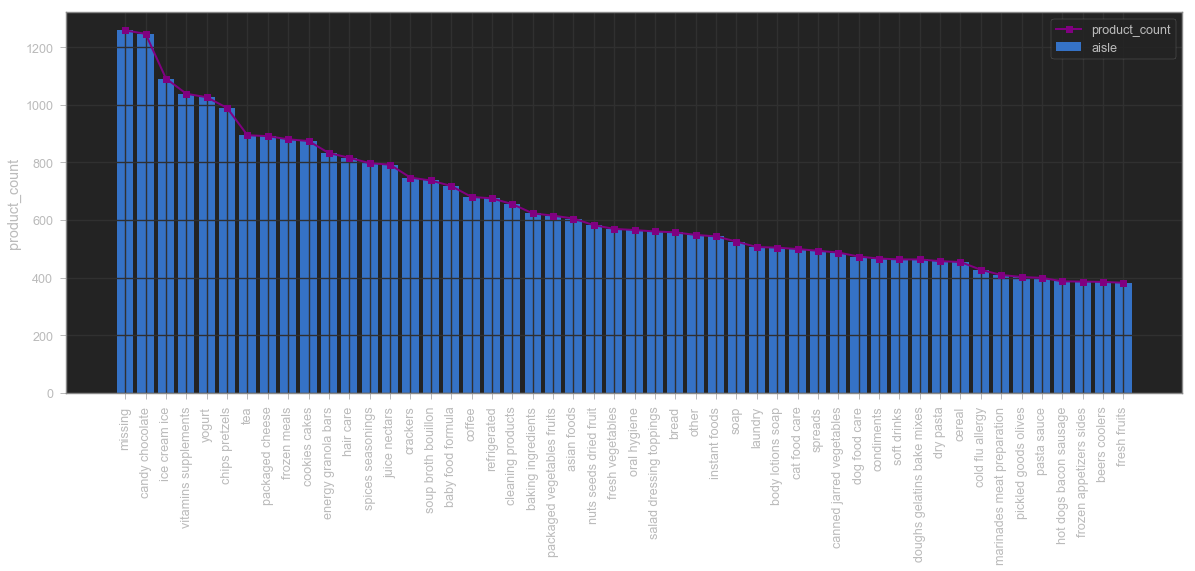

In [71]:
print('Amout of products per aisle: \n')
df_tmp = df_products.groupby(['aisle_id']).agg(product_count=('product_id', 'count')).reset_index().sort_values(by=['product_count'], ascending=False).merge(df_aisles, how='left', on='aisle_id')
print('Dtaframe shape: {} \n'.format(df_tmp.shape))
df_tmp.head(10)
create_bar_chart(df_tmp['aisle'][:50], df_tmp['product_count'][:50], 'aisle', 'product_count')

#### How many orders per department?
This is an interesting questions since we will get to know which are the best selling categories.

Amout of orders per department.
Number of  different departments: 21 

   index  department_id  orders_per_department       department
0      3              4                 409087          produce
1     15             16                 217051       dairy eggs
2     18             19                 118862           snacks
3      6              7                 114046        beverages
4      0              1                 100426           frozen
5     12             13                  81242           pantry
6      2              3                  48394           bakery
7     14             15                  46799     canned goods
8     19             20                  44291             deli
9      8              9                  38713  dry goods pasta


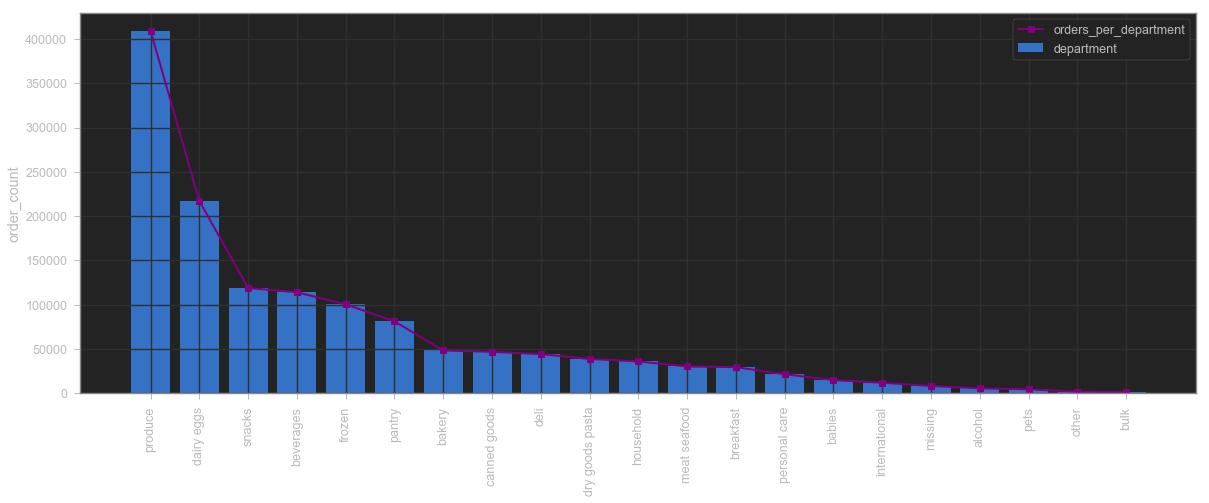

In [72]:
print('Amout of orders per department.')

def orders_per_department(df_order_products):
    df_tmp = df_order_products.merge(df_products, how='left', on='product_id').groupby(['department_id']).agg(orders_per_department=('product_id', 'count')).reset_index()
    return df_tmp.sort_values(by=['orders_per_department'], ascending=False).reset_index().merge(df_departments, how='left', on='department_id')

df_orders_per_department = orders_per_department(df_order_products_train)

print('Number of  different departments: {} \n'.format(df_orders_per_department.shape[0]))
print(df_orders_per_department.head(10))

create_bar_chart(df_orders_per_department['department'], df_orders_per_department['orders_per_department'], 'department', 'order_count')


##### Feature engineering : orders_per_department

Lets create a feature to store the amount of orders each department has

In [73]:
df_departments_new = df_departments.merge(orders_per_department(df_order_products_train)[['department_id', 'orders_per_department']], how='left', on='department_id')
df_departments_new = df_departments_new.rename(columns={"orders_per_department": "orders_per_department_train"})

df_departments = df_departments_new.merge(orders_per_department(df_order_products_prior)[['department_id', 'orders_per_department']], how='left', on='department_id')
df_departments = df_departments.rename(columns={"orders_per_department": "orders_per_department_prior"})
df_departments.head()

,department_id,department,orders_per_department_train,orders_per_department_prior
0,1,frozen,100426,2236432
1,2,other,1795,36291
2,3,bakery,48394,1176787
3,4,produce,409087,9479291
4,5,alcohol,5598,153696


#### How many orders per aisle?

Amout of orders per aisle. 

Number of aisles different: 134 

Plotting the first 50 departments with most orders. 

   index  aisle_id  orders_per_aisle                          aisle
0     82        83            150609               fresh vegetables
1     23        24            150473                   fresh fruits
2    122       123             78493     packaged vegetables fruits
3    119       120             55240                         yogurt
4     20        21             41699                packaged cheese
5    114       115             36617  water seltzer sparkling water
6     83        84             32644                           milk
7    106       107             31269                 chips pretzels
8     90        91             26240                soy lactosefree
9    111       112             23635                          bread


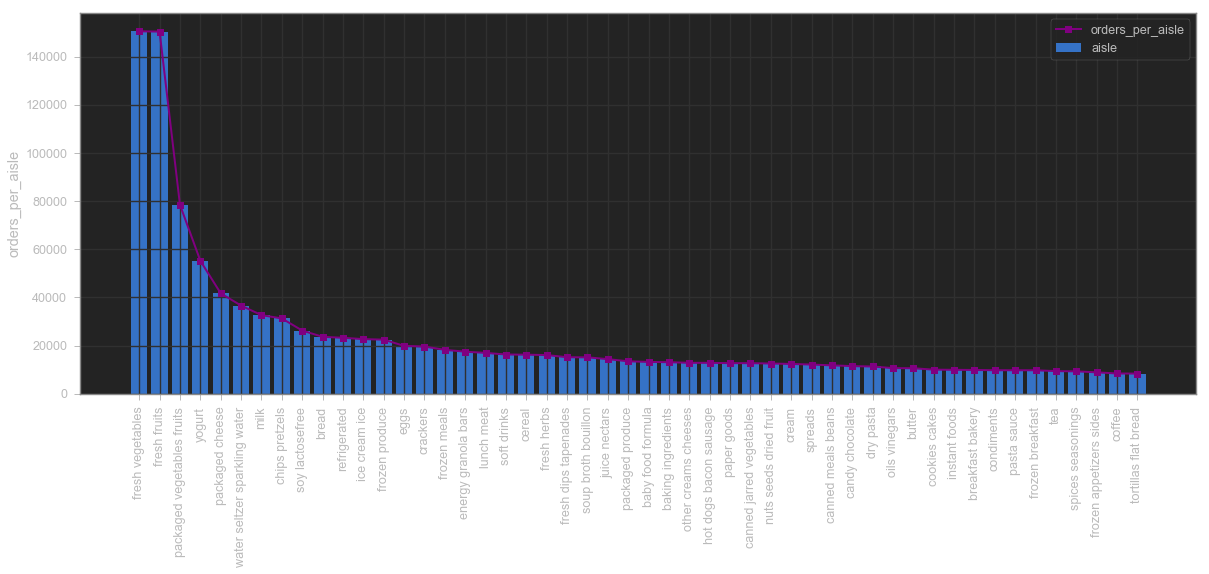

In [74]:
print('Amout of orders per aisle. \n')

def orders_per_aisle(df_order_products):
    df_tmp = df_order_products.merge(df_products, how='left', on='product_id').groupby(['aisle_id']).agg(orders_per_aisle=('product_id', 'count')).reset_index()
    return df_tmp.sort_values(by=['orders_per_aisle'], ascending=False).reset_index().merge(df_aisles, how='left', on='aisle_id')

df_orders_per_aise = orders_per_aisle(df_order_products_train)

print('Number of aisles different: {} \n'.format(df_orders_per_aise.shape[0]))
max_num_depts_for_plot = 50
print('Plotting the first {} departments with most orders. \n'.format(max_num_depts_for_plot))
print(df_orders_per_aise.head(10))

create_bar_chart(df_orders_per_aise['aisle'][:max_num_depts_for_plot], df_orders_per_aise['orders_per_aisle'][:max_num_depts_for_plot], 'aisle', 'orders_per_aisle')

##### Feature engineering : orders_per_aisle

Lets create a feature to store the amount of orders each aisle has

In [75]:
df_aisles_new = df_aisles.merge(orders_per_aisle(df_order_products_train)[['aisle_id', 'orders_per_aisle']], how='left', on='aisle_id')
df_aisles_new = df_aisles_new.rename(columns={"orders_per_aisle": "orders_per_aisle_train"})

df_aisles = df_aisles_new.merge(orders_per_aisle(df_order_products_prior)[['aisle_id', 'orders_per_aisle']], how='left', on='aisle_id')
df_aisles = df_aisles.rename(columns={"orders_per_aisle": "orders_per_aisle_prior"})

df_aisles.head()

,aisle_id,aisle,orders_per_aisle_train,orders_per_aisle_prior
0,1,prepared soups salads,2936,71928
1,2,specialty cheeses,3873,82491
2,3,energy granola bars,17449,456386
3,4,instant foods,9917,200687
4,5,marinades meat preparation,2905,62510


Observations

+ Products
    - Department with more products is 'personal calre' with a count 6563. 
    - Department with less products is 'bulk'
    - Aisle with more products is 'missing' with a count of 1258. It is closely followed by 'candy chocolate' with 1246

+ Orders
    - The best selling department is 'produce' with 409087 sold products.
    - The least selling department is 'bulk'
    - The best selling Aisle is 'fresh vegetables' with 150609. FOllowed by 'fresh fruits' with 150473

#### How many aisles per department are there?

Aisles per department: 

Dtaframe shape: (21, 6) 



,index,department_id,aisle_count,department,orders_per_department_train,orders_per_department_prior
10,10,11,17,personal care,21570,447123
12,12,13,12,pantry,81242,1875577
18,18,19,11,snacks,118862,2887550
0,0,1,11,frozen,100426,2236432
16,16,17,10,household,35986,738666
15,15,16,10,dairy eggs,217051,5414016
6,6,7,8,beverages,114046,2690129
11,11,12,7,meat seafood,30307,708931
4,4,5,5,alcohol,5598,153696
14,14,15,5,canned goods,46799,1068058


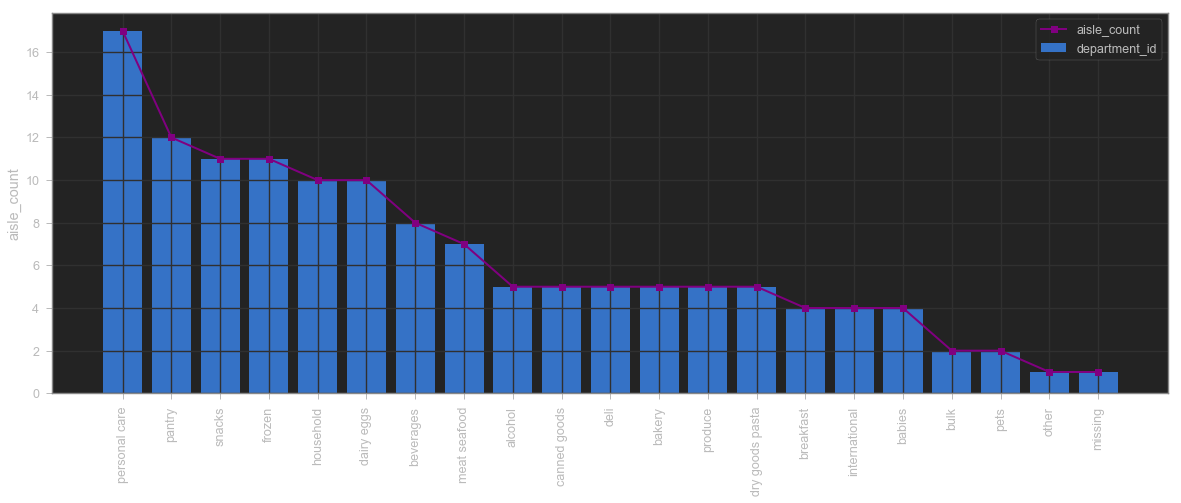

In [76]:
print('Aisles per department: \n')
df_tmp = df_products[['department_id', 'aisle_id']].groupby('department_id').agg(aisle_count =('aisle_id', 'nunique')).merge(df_departments, how='left', on='department_id').reset_index()
df_tmp = df_tmp.sort_values(by=['aisle_count'], ascending=False)
print('Dtaframe shape: {} \n'.format(df_tmp.shape))
df_tmp.head(10)
create_bar_chart(df_tmp['department'], df_tmp['aisle_count'], 'department_id', 'aisle_count')

#### How do product distribute among departments and aisles?

Let's group our orders data by department_id and aisle_id to group products under both features.

,department_id,aisle_id,product_count,department,orders_per_department_train,orders_per_department_prior,aisle,orders_per_aisle_train,orders_per_aisle_prior
133,21,100,1258,missing,8251,69145,missing,8251,69145
119,19,45,1246,snacks,118862,2887550,candy chocolate,11453,300567
1,1,37,1091,frozen,100426,2236432,ice cream ice,22676,498425
53,11,47,1038,personal care,21570,447123,vitamins supplements,1969,45059
102,16,120,1026,dairy eggs,217051,5414016,yogurt,55240,1452343
125,19,107,989,snacks,118862,2887550,chips pretzels,31269,722470
36,7,94,894,beverages,114046,2690129,tea,9376,249341
94,16,21,891,dairy eggs,217051,5414016,packaged cheese,41699,979763
2,1,38,880,frozen,100426,2236432,frozen meals,18221,390299
122,19,61,874,snacks,118862,2887550,cookies cakes,9980,234065


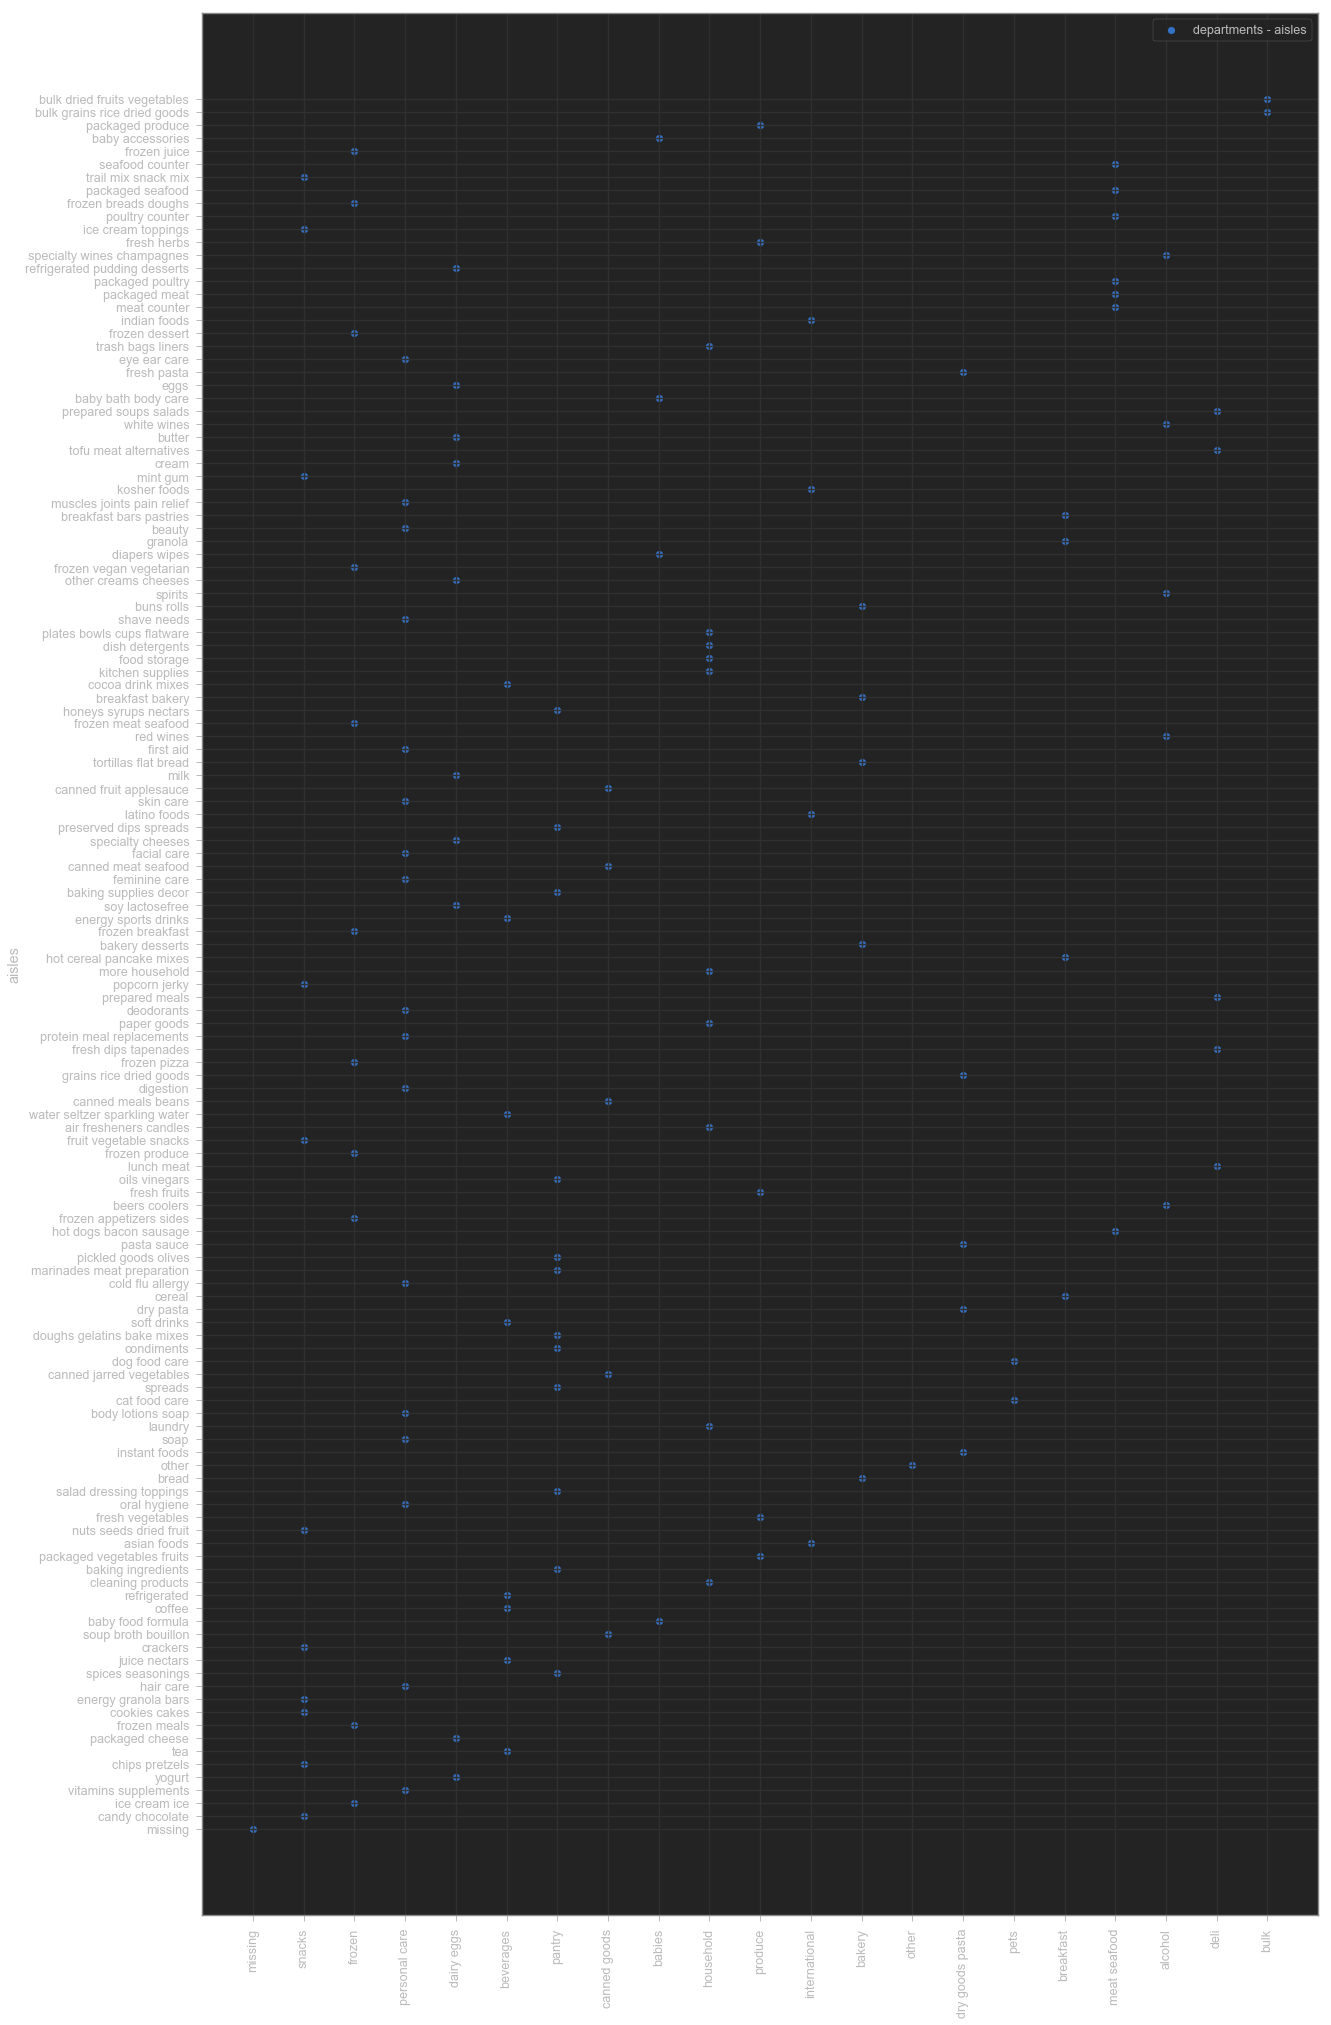

In [77]:
df_product_count_dept_aisle = df_products.groupby(['department_id', 'aisle_id']).agg(product_count=('product_id', 'count')).reset_index()
# Join with the dataframes corresponding to departments and aisles 
df_product_count_dept_aisle = df_product_count_dept_aisle.merge(df_departments, how='left', on='department_id')
df_product_count_dept_aisle = df_product_count_dept_aisle.merge(df_aisles, how='left', on='aisle_id')
df_product_count_dept_aisle = df_product_count_dept_aisle.sort_values(by=['product_count'], ascending=False)

assert df_product_count_dept_aisle.shape[0] == df_aisles.shape[0]
df_product_count_dept_aisle.head(10)

plt.rcParams['figure.figsize'] = [20, 35]
create_scatter_plot(df_product_count_dept_aisle['department'], df_product_count_dept_aisle['aisle'], 'departments - aisles', 'aisles')


In [78]:
#Reset size
plt.rcParams['figure.figsize'] = [20, 7]

In [79]:
df_poducts_dept_aisle = df_products.merge(df_departments, how='left', on='department_id').merge(df_aisles, how='left', on='aisle_id')[['product_name','department', 'aisle']]
# Verify that ALL the products that have a missing department also are missing the aisle
assert df_poducts_dept_aisle.loc[df_poducts_dept_aisle['aisle'] == 'missing'].equals(df_poducts_dept_aisle.loc[df_poducts_dept_aisle['department'] == 'missing']) == True, 'Dataframes are not equal'

Observations 
+ Aisles & Departments
    - The department with more isles is 'personal care' with 17 aisles. Followed by 'pantry' with 12
    - The department with less aisles is 'canned goods' with 5
    - ALL the products that have a missing department also are missing the aisle

In [80]:
df_bestsellers = df_order_products_train.groupby(['product_id']).agg(order_count=('order_id', 'count')).merge(df_products, how='left', on='product_id').reset_index()
df_bestsellers = df_bestsellers.sort_values(by=['order_count'], ascending=False)

df_bestsellers_group_dept_aisle = df_bestsellers.groupby(['department_id', 'aisle_id'])
df_tmp = df_bestsellers_group_dept_aisle.agg({'order_count': 'sum'}).reset_index().merge(df_product_count_dept_aisle, how='left', on=["department_id", "aisle_id"])
# Check that the length of the group for the given key corresponds to the value of the sum of order_count in the second group by step
assert sum(df_bestsellers_group_dept_aisle.get_group(list(df_bestsellers_group_dept_aisle.groups.keys())[0])['order_count'].values) == int(list(df_tmp.loc[df_tmp['aisle_id']==list(df_bestsellers_group_dept_aisle.groups.keys())[0][1]]['order_count'].values)[0])
print('Sorted by order_count:')
df_tmp.sort_values(by=['order_count'], ascending=False).head(10)
print('Sorted by product_count:')
df_tmp.sort_values(by=['product_count'], ascending=False).head(10)

Sorted by order_count:


,department_id,aisle_id,order_count,product_count,department,orders_per_department_train,orders_per_department_prior,aisle,orders_per_aisle_train,orders_per_aisle_prior
20,4,83,150609,569,produce,409087,9479291,fresh vegetables,150609,3418021
18,4,24,150473,382,produce,409087,9479291,fresh fruits,150473,3642188
21,4,123,78493,615,produce,409087,9479291,packaged vegetables fruits,78493,1765313
102,16,120,55240,1026,dairy eggs,217051,5414016,yogurt,55240,1452343
94,16,21,41699,891,dairy eggs,217051,5414016,packaged cheese,41699,979763
38,7,115,36617,344,beverages,114046,2690129,water seltzer sparkling water,36617,841533
98,16,84,32644,243,dairy eggs,217051,5414016,milk,32644,891015
125,19,107,31269,989,snacks,118862,2887550,chips pretzels,31269,722470
100,16,91,26240,293,dairy eggs,217051,5414016,soy lactosefree,26240,638253
15,3,112,23635,557,bakery,48394,1176787,bread,23635,584834


Sorted by product_count:


,department_id,aisle_id,order_count,product_count,department,orders_per_department_train,orders_per_department_prior,aisle,orders_per_aisle_train,orders_per_aisle_prior
133,21,100,8251,1258,missing,8251,69145,missing,8251,69145
119,19,45,11453,1246,snacks,118862,2887550,candy chocolate,11453,300567
1,1,37,22676,1091,frozen,100426,2236432,ice cream ice,22676,498425
53,11,47,1969,1038,personal care,21570,447123,vitamins supplements,1969,45059
102,16,120,55240,1026,dairy eggs,217051,5414016,yogurt,55240,1452343
125,19,107,31269,989,snacks,118862,2887550,chips pretzels,31269,722470
36,7,94,9376,894,beverages,114046,2690129,tea,9376,249341
94,16,21,41699,891,dairy eggs,217051,5414016,packaged cheese,41699,979763
2,1,38,18221,880,frozen,100426,2236432,frozen meals,18221,390299
122,19,61,9980,874,snacks,118862,2887550,cookies cakes,9980,234065


Observations:
- The first table above shows the number of orders per (department, aisle) pair.
- The second table above shows the number of products existent in each (department, aisle) pair.

## Let's look at the past

In order to better understand our users we will figure out how the orders distribute over time for each one of the users. Let's first figure out over how many days the orders take place and then we will infer dates from the feature 'days_since_prior_order' in the df_orders dataframe

In [81]:
plt.rcParams['figure.figsize'] = [15, 7]

In [82]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences
0,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...
1,857644,69792,train,4,0,0,29.0,2016-04-01 00:00:00,13,organicavocado_47766 shreddedparmesan_4799 unc...
2,2379808,193128,train,4,6,0,0.0,2016-04-01 00:00:00,13,9paperplate_19779 classicmixvariety_19734
3,274779,35031,train,4,2,0,0.0,2016-04-01 00:00:00,13,schoolsafechocolatecupcakes_28489 organicwhole...
4,91799,62272,train,4,1,1,0.0,2016-04-01 01:00:00,13,organicwholewheatelbows_283 ripelargepittedoli...


In [88]:
df_orders_per_user =  df_orders.groupby('user_id')
df_users = df_orders_per_user.agg(orders_time_interval = ('days_since_prior_order', 'sum'), orders_per_user = ('order_id', 'nunique')).reset_index()
df_users.sort_values(by=['orders_per_user'], ascending=False).head()

,user_id,orders_time_interval,orders_per_user
152339,152340,341.0,100
185640,185641,275.0,100
185523,185524,195.0,100
81677,81678,189.0,100
70921,70922,259.0,100


Lets save the df_users dataframe so we can reuse it in other notebooks

In [89]:
if path.exists('data/enhanced/df_users.csv') == False:
    df_users.to_csv('data/enhanced/df_users.csv', index = None, header=True)
else:
    # Otherwise load the data
    df_users = pd.read_csv('data/enhanced/df_users.csv')

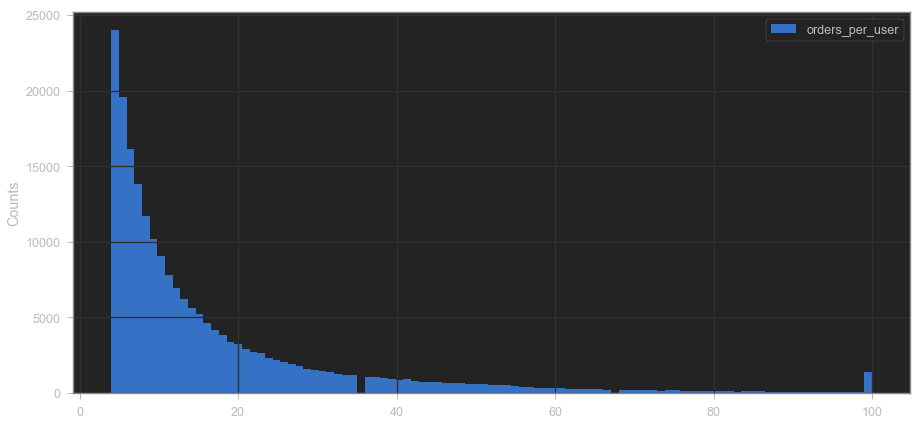

In [90]:
hist_data = df_users['orders_per_user'].values
bins = np.linspace(hist_data.min(), hist_data.max(), hist_data.max())
create_hist(hist_data, bins, 'orders_per_user', 'Counts')

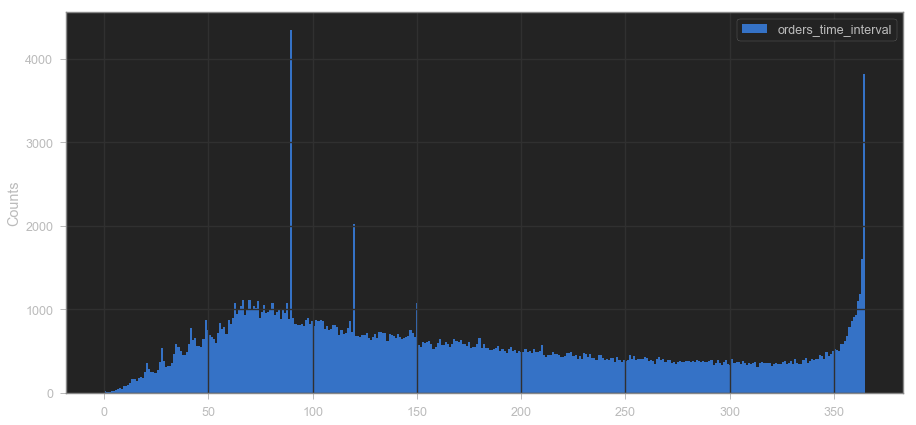

In [85]:
hist_data = df_users['orders_time_interval'].values
bins = np.linspace(hist_data.min(), hist_data.max(), hist_data.max())
create_hist(hist_data, bins, 'orders_time_interval', 'Counts')

### Order dates

Let's make use of the 'days_since_prior_order' feature from the 'df_orders' dataset in order to stitch the orders for each user together over the period of time over which the orders took place. This will allow us to analyze orders seasonality over time and to better understand the context of each one of the orders.

We will assume without loss of generality that the initial date is '2016-01-01 at 00:00'. @016 has been chose since the dataset was released in 2017 so we are assuming that the data corresponds to the previous year. This assumption should not impact our results drastically since seasonal patterns repeat over the year.



In [ ]:
def create_dates_for_orders(df_user_orders, verbose=False):
    year = 2016
    # We start at the first month of the year
    current_month = 1 
    df_user_orders = df_user_orders.fillna(0)
    order_dates = []
    
    for index, order in df_user_orders.iterrows():
        day_counter = 1 
        # Get month name from integer value
        month_name = month[str(current_month)]
        # Get number of days in month
        days_in_current_month = days_in_month(month_name, year)
        # Update day_counter. It is used as the month day number
        day_counter += order['days_since_prior_order']
        
        # Consider only 12 months
        if current_month < 12:
            current_month += 1
            
        if day_counter >= days_in_current_month:
            day_counter = day_counter - days_in_current_month + 1
            if verbose == True:
                print('----------------------------------------------------------')
                print('Month change ---------------------------------------------')
                print('Days in previous month: {}'.format(days_in_current_month))
                print('----------------------------------------------------------')
                
        order_date = datetime.datetime(year=int(year), month=int(current_month)-1, day=int(day_counter), hour=int(order['order_hour_of_day']))
        order_dates.append(order_date)
        
        if verbose == True:
            print('Creating date with: Year:{}, Month:{}, Day :{}, Hour:{}'.format(year, current_month - 1, day_counter, order['order_hour_of_day']))
            print('Order Id: {}, Date: {}'.format(order['order_id'], order_date))
            print('----------------------------------------------------------')
    
    df_user_orders['order_date'] = order_dates
    return df_user_orders

#### Feature engineering : order_dates

Possibly the most relevant feature that we will engineer for this task. Let's compute 'order_dates' for all the orders in df_orders.

In [ ]:
def compute_dates_for_all_orders(df_orders_per_user, verbose=False):
    df_orders_new = pd.DataFrame()
    for user_id, user_group in df_orders_per_user:
        user_group = user_group.sort_values(by=['order_number'], ascending=True)
        user_group_dates = create_dates_for_orders(user_group, False)
        user_group_dates['user_id'] = [user_id] * user_group_dates.shape[0]
        df_orders_new = pd.concat([df_orders_new, user_group_dates])
        
        if verbose == True:
            print('Creating dates for user_id: {}'.format(user_id))
    return df_orders_new

In [ ]:
if path.exists('data/enhanced/df_orders.csv') == False:
    # Compute dates for all orders and all users
    df_orders_new = compute_dates_for_all_orders(df_orders_per_user, verbose=True)
    # Save it to disk
    df_orders_new.to_csv('data/enhanced/df_orders.csv', index = None, header=True)
else:
    # Otherwise load the data
    df_orders = pd.read_csv('data/enhanced/df_orders.csv').sort_values(by=['order_date'], ascending=True)

In [ ]:
df_orders.head()

#### Feature engineering : week_of_year
This feature will tell us on which week of the year the order took place. This will help us slice our data per week and better study weekly seasonal patterns.

In [ ]:
if path.exists('data/enhanced/df_orders.csv') == False:
    # Compute dates for all orders and all users
    df_orders['week_of_year'] = df_orders.apply(lambda row: datetime.datetime.strptime(row['order_date'] , '%Y-%m-%d %H:%M:%S').isocalendar()[1] , axis=1)
    # Save it to disk
    df_orders_new.to_csv('data/enhanced/df_orders.csv', index = None, header=True)
else:
    # Otherwise load the data
    df_orders = pd.read_csv('data/enhanced/df_orders.csv').sort_values(by=['order_date'], ascending=True)

In [ ]:
df_orders.head()

### Let's look at some of our users

Let's take a look at all the orders over the year for our best consumers (users that have places more orders within the period of time)

In [ ]:
df_users.sort_values(by=['orders_per_user'], ascending=False).head(5)

In [ ]:
df_users.sort_values(by=['orders_per_user'], ascending=True).head(5)

In [ ]:
df_users.loc[df_users['orders_per_user']==30]

In [ ]:
tmp_counts = df_users['orders_per_user'].values
bins = np.linspace(tmp_counts.min(), tmp_counts.max(), tmp_counts.max())
plt.hist(tmp_counts, bins=bins, label="orders_per_user")
plt.legend()
plt.grid()
plt.ylabel("Count");

In [ ]:
def plot_user_seasonality(df_orders, user_id):
    df_orders_usr = df_orders.groupby('user_id').get_group(user_id).copy()
    df_orders_usr['order_date'] = pd.to_datetime(df_orders_usr['order_date']).dt.date
    df_o_s_usr =  df_orders_usr.groupby('order_date').agg(order_per_date=('order_id', 'count'))
    df_o_s_usr.index = pd.to_datetime(df_o_s_usr.index)
    idx = pd.date_range(min(df_o_s_usr.index), max(df_o_s_usr.index))
    df_user_timeserie = df_o_s_usr.reindex(idx, fill_value=0)
    
    return df_user_timeserie


In [ ]:
df_152340 = plot_user_seasonality(df_orders, 152340)
df_185524 = plot_user_seasonality(df_orders, 205784)
df_127633 = plot_user_seasonality(df_orders, 127633)

plt.plot(df_152340.index,df_152340.order_per_date, label='The compulsive monthly buyer')
plt.plot(df_185524.index,df_185524.order_per_date, label='The chill monthly buyer')
plt.plot(df_127633.index,df_127633.order_per_date, label='The rare shopper')

plt.legend()
plt.grid()
plt.title('User seasonality over year')
plt.ylabel('Number of orders per user');
plt.show()

### Products

In [ ]:
df_orders_products = df_orders_prior.merge(df_order_products_prior, on='order_id', how='left')
df_orders_products = df_orders_products.groupby('product_id')

In [ ]:
def plot_product_seasonality(df_orders_products, product_id):
    df_orders_products = df_orders_products.get_group(product_id).copy()
    df_orders_products['order_date'] = pd.to_datetime(df_orders_products['order_date']).dt.date
    df_o_prod=  df_orders_products.groupby('order_date').agg(order_per_date=('order_id', 'count'))
    df_o_prod.index = pd.to_datetime(df_o_prod.index)
    idx = pd.date_range(min(df_o_prod.index), max(df_o_prod.index))
    df_prod_timeserie = df_o_prod.reindex(idx, fill_value=0)
    return df_prod_timeserie

In [24]:
df_products.loc[df_products.product_name.str.contains('Wine')].sort_values(by=['orders_per_product_prior'], ascending=False)
# ['organicsoytempeh_37147', 'size5cruisersdiaperssuperpack_38365', 'organiccheesefrozenpizza_24561']

,product_id,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded
41054,41055,Organic Red Wine Vineger,19,13,91.0,2586.0,organicredwinevineger_41055
36424,36425,Chardonnay Wine,62,5,76.0,1999.0,chardonnaywine_36425
49543,49544,Cabernet Sauvignon Wine,28,5,55.0,1835.0,cabernetsauvignonwine_49544
37922,37923,Prosecco Sparkling Wine,134,5,80.0,1770.0,proseccosparklingwine_37923
26306,26307,Aged Red Wine Vinegar,19,13,82.0,1591.0,agedredwinevinegar_26307
...,...,...,...,...,...,...,...
14592,14593,Red Blend Wine,28,5,NaN,3.0,redblendwine_14593
44061,44062,Grand Estate Chardonnay Wine,62,5,NaN,3.0,grandestatechardonnaywine_44062
33898,33899,Red Wine Blend,28,5,NaN,3.0,redwineblend_33899
40110,40111,Garnacha Red Wine,28,5,NaN,3.0,garnacharedwine_40111


Text(0.5,1,'Product seasonality over year')

Text(0,0.5,'Product sales')

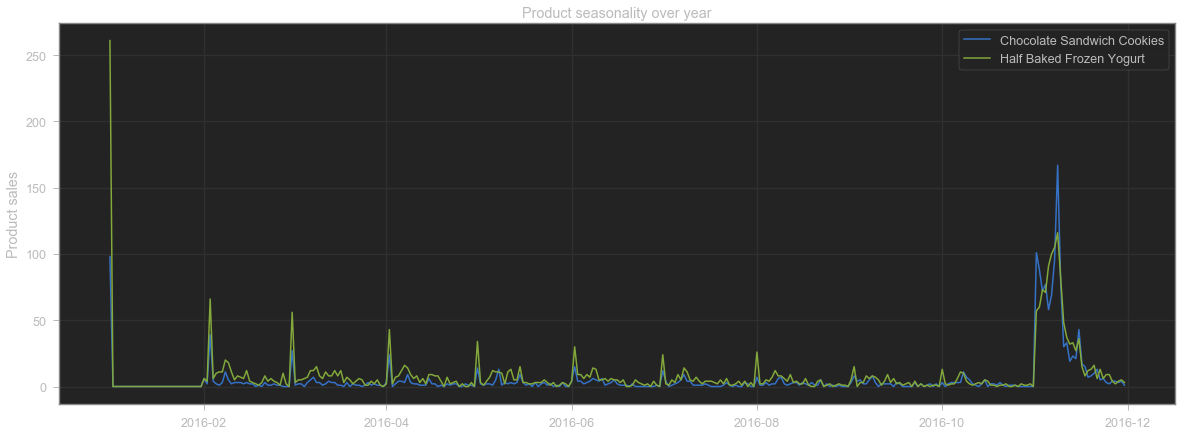

In [57]:
df_1 = plot_product_seasonality(df_orders_products, 1)
prod_1_name = df_products.loc[df_products['product_id'] == 1]['product_name'].values[0]

df_30668= plot_product_seasonality(df_orders_products, 30668)
prod_30668_name = df_products.loc[df_products['product_id'] == 30668]['product_name'].values[0]

plt.plot(df_1.index,df_1.order_per_date, label=prod_1_name)
plt.plot(df_30668.index,df_30668.order_per_date, label=prod_30668_name)

plt.legend()
plt.grid()
plt.title('Product seasonality over year')
plt.ylabel('Product sales');
plt.show()

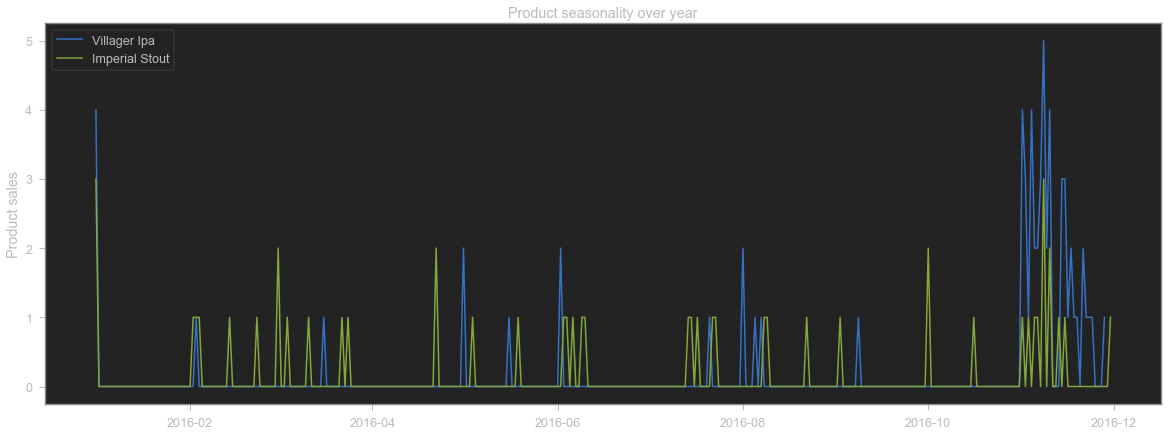

In [58]:
df_960 = plot_product_seasonality(df_orders_products, 960)
prod_960_name = df_products.loc[df_products['product_id'] == 960]['product_name'].values[0]

df_15071 = plot_product_seasonality(df_orders_products, 15071)
prod_15071_name = df_products.loc[df_products['product_id'] == 15071]['product_name'].values[0]

plt.plot(df_960.index,df_960.order_per_date, label=prod_960_name)
plt.plot(df_15071.index,df_15071.order_per_date, label=prod_15071_name)

plt.legend()
plt.title('Product seasonality over year')
plt.ylabel('Product sales');
plt.show();

In [66]:
df_departments.head()

,department_id,department,orders_per_department_train,orders_per_department_prior
0,1,frozen,100426,2236432
1,2,other,1795,36291
2,3,bakery,48394,1176787
3,4,produce,409087,9479291
4,5,alcohol,5598,153696


### Seasonality

In [94]:
def plot_departments(dataframe, popular_departments, ylabel, title=''):
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.xticks(rotation=90)

    for department_id in popular_departments:
        plt.plot(dataframe[dataframe['department_id']==int(department_id)]['order_date'], 
                 dataframe[dataframe['department_id']==int(department_id)]['order_count'], 
                 label=df_tmp[df_tmp['department_id']==int(department_id)]['department'].values[0])

    plt.legend()
    plt.grid()
    plt.title(title)
    plt.ylabel(ylabel);

In [95]:
# df_orders = df_orders.set_index('order_date')
df_departments = df_departments.sort_values(by=['orders_per_department_prior'], ascending=False)

In [96]:
df_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences
0,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...
1,857644,69792,train,4,0,0,29.0,2016-04-01 00:00:00,13,organicavocado_47766 shreddedparmesan_4799 unc...
2,2379808,193128,train,4,6,0,0.0,2016-04-01 00:00:00,13,9paperplate_19779 classicmixvariety_19734
3,274779,35031,train,4,2,0,0.0,2016-04-01 00:00:00,13,schoolsafechocolatecupcakes_28489 organicwhole...
4,91799,62272,train,4,1,1,0.0,2016-04-01 01:00:00,13,organicwholewheatelbows_283 ripelargepittedoli...


#### Month

In [97]:
df_orders_month = get_orders_in_month(df_orders.set_index('order_date'), '11')
df_orders_month.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,week_of_year,product_sequences
order_date,,,,,,,,,
2016-11-01 00:00:00,256705,166457,train,19,6,0,30.0,44,hardwoodsmokedbacon_36431 buttermilkcompletepa...
2016-11-01 00:00:00,1540872,22339,train,20,4,0,30.0,44,organicredlentilrotinipasta_39570 kalekrunchth...
2016-11-01 00:00:00,2967920,191557,train,24,6,0,30.0,44,drinkingwater_40939
2016-11-01 00:00:00,660490,44573,train,17,1,0,30.0,44,springwater_19660 naturalartesianbottledwater_...
2016-11-01 00:00:00,605436,158284,train,23,5,0,30.0,44,naturalchickensagebreakfastsausage_27695 organ...


##### Popular departments

In [98]:
df_orders_month = df_orders_month.reset_index()

,department_id,order_date,order_count,department,orders_per_department_train,orders_per_department_prior,average_sells
0,1.0,2016-11-01,56467,frozen,100426,2236432,0.025249
1,1.0,2016-11-02,46405,frozen,100426,2236432,0.020750
2,1.0,2016-11-03,63508,frozen,100426,2236432,0.028397
3,1.0,2016-11-04,82557,frozen,100426,2236432,0.036915
4,1.0,2016-11-05,91101,frozen,100426,2236432,0.040735


10 most puopular departments: [21.0, 10.0, 18.0, 16.0, 4.0, 19.0, 7.0, 3.0, 2.0, 14.0]


/Users/lgarcia/opt/anaconda3/envs/ds-env/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


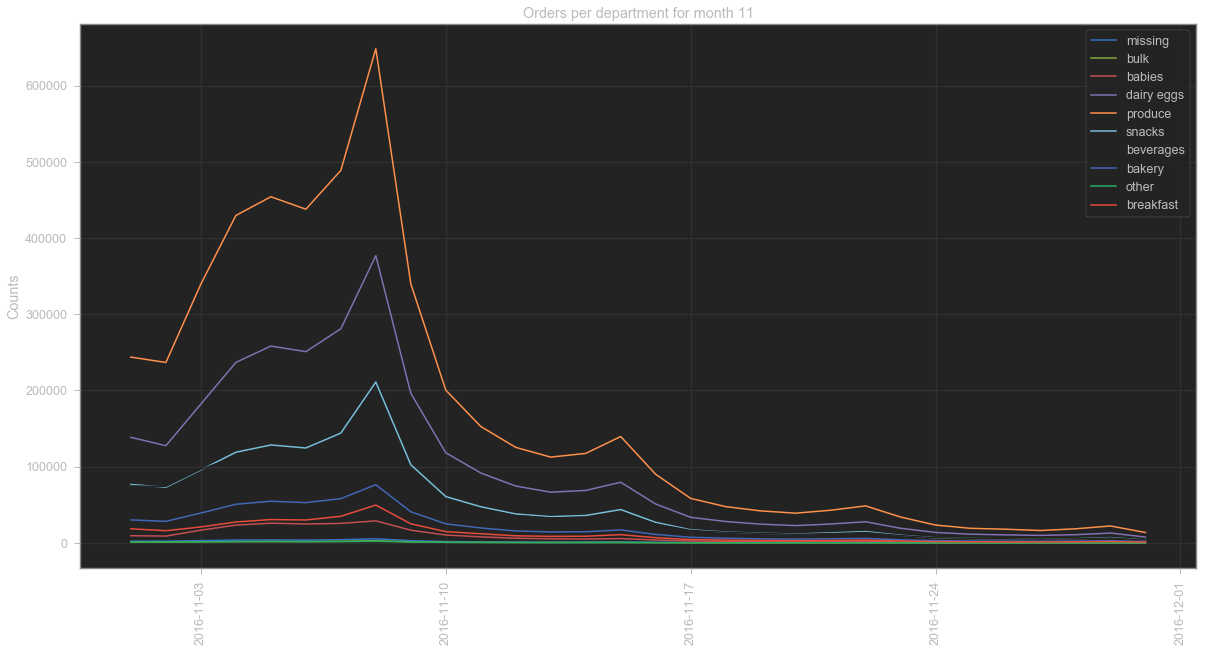

In [99]:
# Cut out hour 
df_orders_month['order_date'] = pd.to_datetime(df_orders_month['order_date']).dt.date
# Agregate
df_order_month_details = df_orders_month.merge(df_order_products_prior, on='order_id', how='left').merge(df_products, on='product_id', how='left')
df_tmp = df_order_month_details.groupby(['department_id', 'order_date']).agg(order_count=('order_id', 'count')).reset_index()
df_tmp = df_tmp.merge(df_departments, how='left', on='department_id')
df_tmp['average_sells'] = df_tmp.apply(lambda row: row['order_count']/row['orders_per_department_prior'], 
                                       axis=1)
df_tmp.head()
popular_departments= list(df_tmp.groupby('department_id').agg(order_sum=('average_sells', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['department_id'].values)[:10]
print('10 most puopular departments: {}'.format(popular_departments))

plot_departments(df_tmp, popular_departments, 'Counts',  'Orders per department for month 11')

##### Popular products

In [100]:
def plot_products(dataframe, popular_products, ylabel, title):
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.xticks(rotation=90)

    for product_id in popular_products:
        plt.plot(dataframe[dataframe['product_id']==int(product_id)]['order_date'], 
                 dataframe[dataframe['product_id']==int(product_id)]['order_count'], 
                 label=df_tmp[df_tmp['product_id']==int(product_id)]['product_name'].values[0])
    plt.legend()
    plt.grid()
    plt.title(title)
    plt.ylabel(ylabel);

In [101]:
df_products.head()

,product_id,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded
0,1,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
1,2,All-Seasons Salt,104,13,4.0,90.0,allseasonssalt_2
2,3,Robust Golden Unsweetened Oolong Tea,94,7,6.0,277.0,robustgoldenunsweetenedoolongtea_3
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,22.0,329.0,smartonesclassicfavoritesminirigatoniwithvodka...
4,5,Green Chile Anytime Sauce,5,13,1.0,15.0,greenchileanytimesauce_5


25 most puopular products: [24852.0, 13176.0, 21137.0, 21903.0, 47209.0, 27966.0, 47626.0, 47766.0, 27845.0, 16797.0, 26209.0, 22935.0, 45007.0, 24964.0, 8277.0, 39275.0, 28204.0, 5876.0, 4920.0, 49683.0, 30391.0, 19057.0, 40706.0, 37646.0, 49235.0]


,product_id,order_date,order_count,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded
0,1.0,2016-11-01,101,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
1,1.0,2016-11-02,88,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
2,1.0,2016-11-03,72,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
3,1.0,2016-11-04,77,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
4,1.0,2016-11-05,58,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1


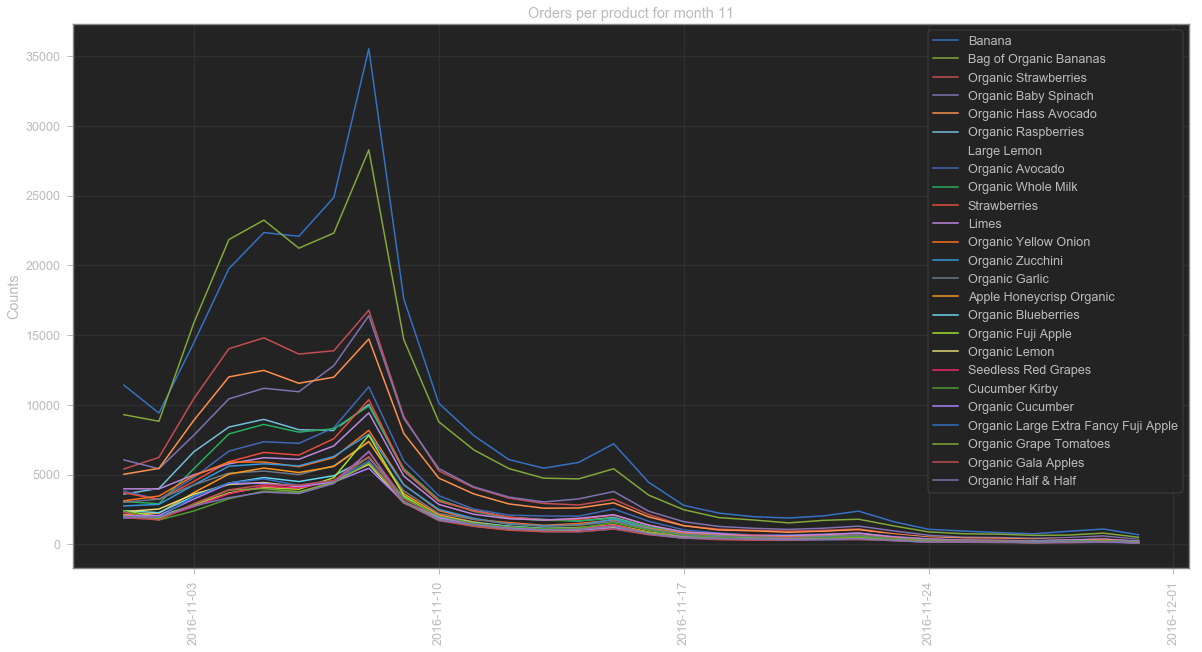

In [102]:
#Cut out hour 
df_orders_month['order_date'] = pd.to_datetime(df_orders_month['order_date']).dt.date
# Agregate
df_order_month_details = df_orders_month.merge(df_order_products_prior, on='order_id', how='left').merge(df_products, on='product_id', how='left')
df_tmp = df_order_month_details.groupby(['product_id', 'order_date']).agg(order_count=('order_id', 'count')).reset_index()
df_tmp = df_tmp.merge(df_products, how='left', on='product_id')

popular_products = list(df_tmp.groupby('product_id').agg(order_sum=('order_count', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['product_id'].values)[:25]
print('25 most puopular products: {}'.format(popular_products))
df_tmp.head()

plot_products(df_tmp, popular_products, 'Counts',  'Orders per product for month 11')

#### Week

In [103]:
def get_orders_in_week(df_orders, week_number):
    return df_orders.loc[df_orders['week_of_year'] == week_number]

##### Popular departments

In [104]:
df_orders_week = get_orders_in_week(df_orders, 5)
df_orders_week= df_orders_week.reset_index()
df_orders_week.head()

,index,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences
0,337418,1589601,74527,prior,2,6,0,0.0,2016-02-01 00:00:00,5,guavanectar_25438 zantecurrants_41107 blueberr...
1,337419,1969864,127437,prior,2,5,0,28.0,2016-02-01 00:00:00,5,breakfastpatties_34343 redplasticcups_15680 sm...
2,337420,1470698,70066,prior,2,1,0,28.0,2016-02-01 00:00:00,5,cohosalmon_35629 blueberries_9076 umeplumvineg...
3,337421,1954858,58379,prior,2,1,0,28.0,2016-02-01 00:00:00,5,organicroastedslicedchickenbreast_36735 organi...
4,337422,3104624,118286,prior,2,5,0,28.0,2016-02-01 00:00:00,5,sinfullysweetcamparitomatoes_33768 organicextr...


,department_id,order_date,order_count,department,orders_per_department_train,orders_per_department_prior,average_sells
0,1,2016-02-01,3800,frozen,100426,2236432,0.001699
1,1,2016-02-02,3595,frozen,100426,2236432,0.001607
2,1,2016-02-03,40541,frozen,100426,2236432,0.018128
3,1,2016-02-04,4393,frozen,100426,2236432,0.001964
4,1,2016-02-05,5605,frozen,100426,2236432,0.002506


10 most puopular departments: [5, 17, 11, 13, 1, 2, 6, 9, 15, 12]


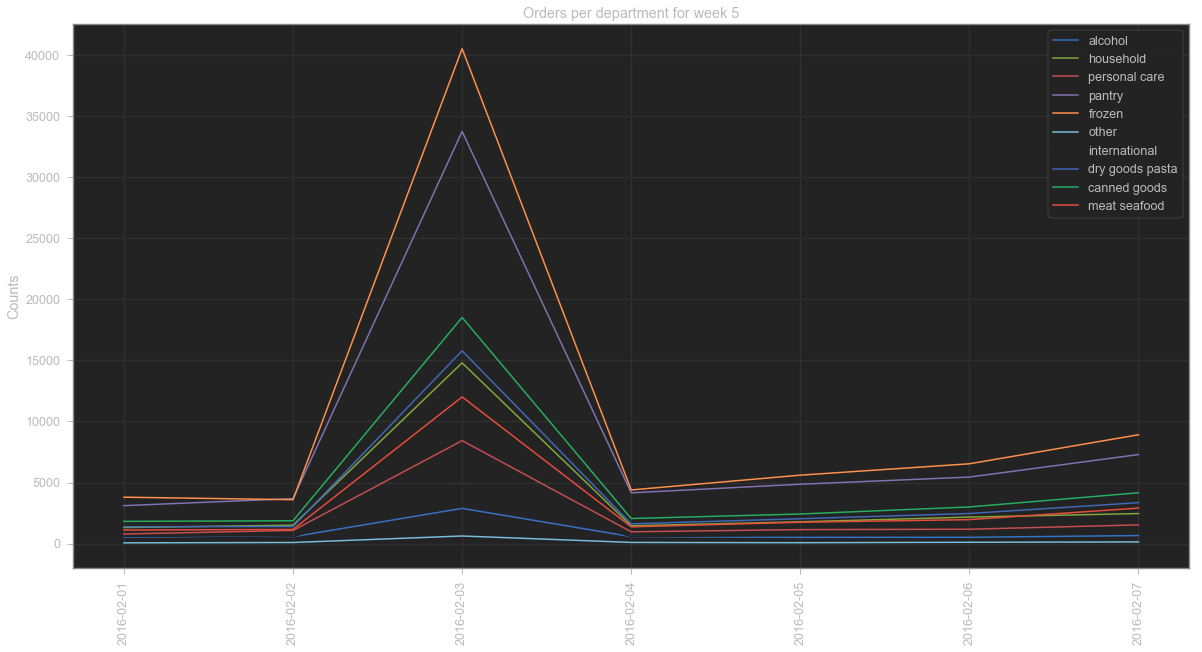

In [105]:
#Cut out hour 
df_orders_week['order_date'] = pd.to_datetime(df_orders_week['order_date']).dt.date

# Aggregate
df_order_week_details = df_orders_week.merge(df_order_products_prior, on='order_id', how='left').merge(df_products, on='product_id', how='left')
df_tmp = df_order_week_details.groupby(['department_id', 'order_date']).agg(order_count=('order_id', 'count')).reset_index()
df_tmp = df_tmp.merge(df_departments, how='left', on='department_id')
# df_tmp = df_tmp.sort_values(by=['order_count'], ascending=False)
df_tmp['average_sells'] = df_tmp.apply(lambda row: row['order_count']/row['orders_per_department_prior'], 
                                       axis=1)
df_tmp.head()
popular_departments= list(df_tmp.groupby('department_id').agg(order_sum=('average_sells', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['department_id'].values)[:10]
print('10 most puopular departments: {}'.format(popular_departments))

plot_departments(df_tmp, popular_departments,  'Counts',  'Orders per department for week 5')

##### Popular products

25 most puopular products: [24852, 13176, 21137, 21903, 47766, 47209, 26209, 47626, 16797, 27845, 39275, 24964, 49683, 27966, 22935, 4605, 5876, 45007, 40706, 28204, 4920, 45066, 17794, 28985, 44632]


,product_id,order_date,order_count,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded
0,1,2016-02-01,6,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
1,1,2016-02-02,2,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
2,1,2016-02-03,39,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
3,1,2016-02-04,4,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
4,1,2016-02-05,2,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1


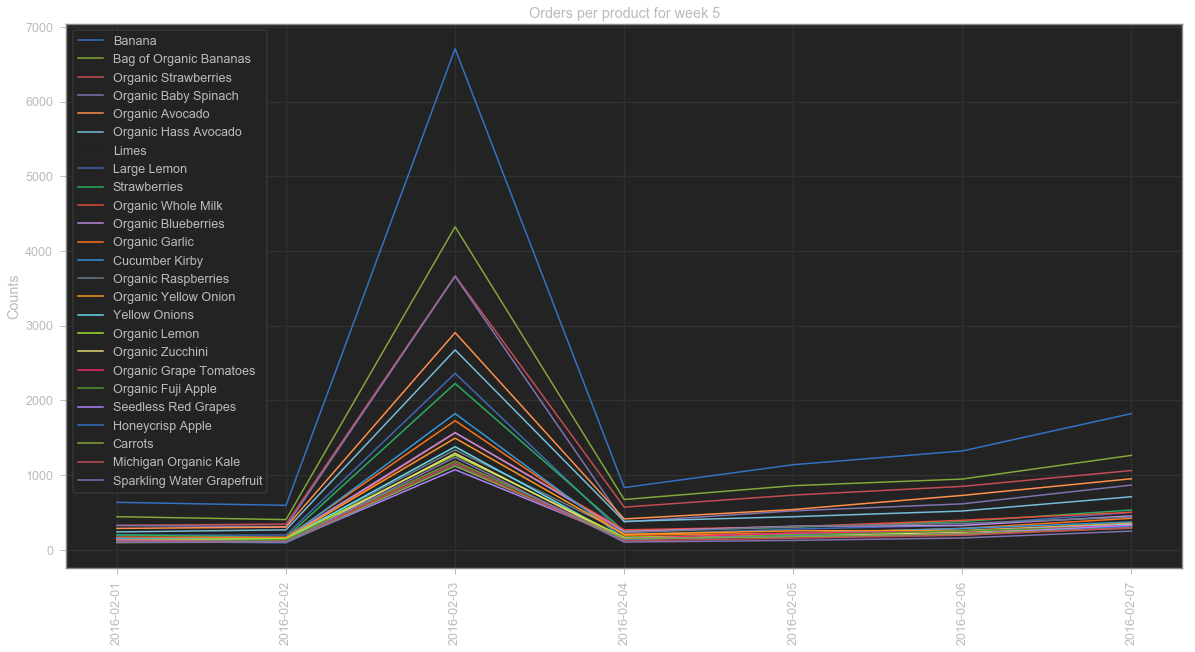

In [106]:
#Cut out hour 
df_orders_week['order_date'] = pd.to_datetime(df_orders_week['order_date']).dt.date

# Agregate
df_order_week_details = df_orders_week.merge(df_order_products_prior, on='order_id', how='left').merge(df_products, on='product_id', how='left')
df_tmp = df_order_week_details.groupby(['product_id', 'order_date']).agg(order_count=('order_id', 'count')).reset_index()
df_tmp = df_tmp.merge(df_products, how='left', on='product_id')

# df_tmp['average_sells'] = df_tmp.apply(lambda row: row['order_count']/row['orders_per_product_prior'], axis=1)

# popular_products = list(df_tmp.groupby('product_id').agg(order_sum=('average_sells', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['product_id'].values)[:25]
popular_products = list(df_tmp.groupby('product_id').agg(order_sum=('order_count', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['product_id'].values)[:25]

print('25 most puopular products: {}'.format(popular_products))
df_tmp.head()

plot_products(df_tmp, popular_products, 'Counts',  'Orders per product for week 5')

#### Day

In [107]:
df_orders_day = get_orders_in_day(df_orders, month_number='11', day_number='03')
df_orders_day.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,week_of_year,product_sequences
order_date,,,,,,,,,
2016-11-03 00:00:00,733419,14689,train,85,0,0,2.0,44,grilledchickenbreaststrips_17878 organic100who...
2016-11-03 00:00:00,1020627,66091,train,11,4,0,2.0,44,crinklecutfrenchfries_22451 wholestrawberries_...
2016-11-03 00:00:00,1521740,206165,train,28,6,0,2.0,44,originalvanillanutritionshake_14648 kefircultu...
2016-11-03 00:00:00,3084045,212,train,13,0,0,2.0,44,cagefreelargewhiteeggs_11712 purecoconutmilk_1...
2016-11-03 00:00:00,3188190,52106,train,38,5,0,2.0,44,briochesliderbuns_9080


In [108]:
df_orders_day= df_orders_day.reset_index()
df_orders_day.head()

,order_date,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,week_of_year,product_sequences
0,2016-11-03 00:00:00,733419,14689,train,85,0,0,2.0,44,grilledchickenbreaststrips_17878 organic100who...
1,2016-11-03 00:00:00,1020627,66091,train,11,4,0,2.0,44,crinklecutfrenchfries_22451 wholestrawberries_...
2,2016-11-03 00:00:00,1521740,206165,train,28,6,0,2.0,44,originalvanillanutritionshake_14648 kefircultu...
3,2016-11-03 00:00:00,3084045,212,train,13,0,0,2.0,44,cagefreelargewhiteeggs_11712 purecoconutmilk_1...
4,2016-11-03 00:00:00,3188190,52106,train,38,5,0,2.0,44,briochesliderbuns_9080


##### Popular departments

,department_id,order_date,order_count,department,orders_per_department_train,orders_per_department_prior,average_sells
503,21.0,2016-11-03 23:00:00,38,missing,8251,69145,0.000550
431,18.0,2016-11-03 23:00:00,183,babies,14941,423802,0.000432
287,12.0,2016-11-03 23:00:00,314,meat seafood,30307,708931,0.000443
191,8.0,2016-11-03 23:00:00,42,pets,4497,97724,0.000430
455,19.0,2016-11-03 23:00:00,1125,snacks,118862,2887550,0.000390


10 most puopular departments: [5.0, 21.0, 10.0, 18.0, 2.0, 13.0, 7.0, 4.0, 11.0, 6.0]


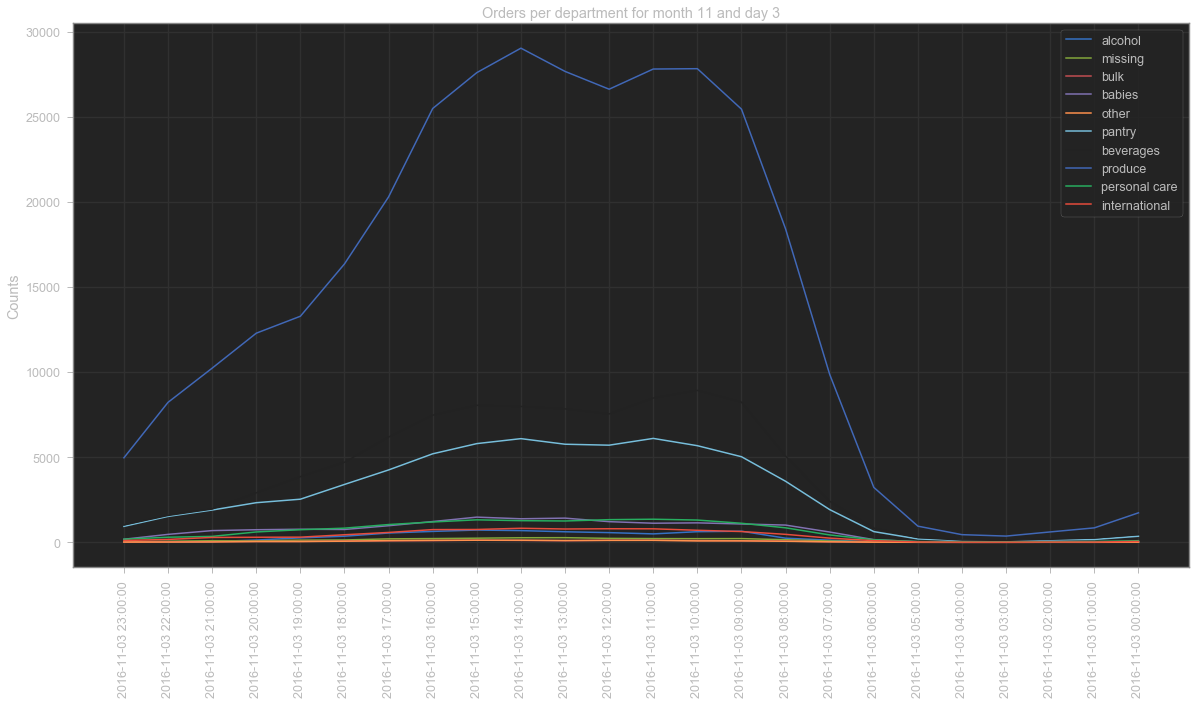

In [109]:
# Agregate
df_orders_day_details = df_orders_day.merge(df_order_products_prior, on='order_id', how='left').merge(df_products, on='product_id', how='left')
df_tmp = df_orders_day_details.groupby(['department_id', 'order_date']).agg(order_count=('order_id', 'count')).reset_index()
df_tmp = df_tmp.merge(df_departments, how='left', on='department_id')
df_tmp = df_tmp.sort_values(by=['order_date'], ascending=False)

df_tmp['average_sells'] = df_tmp.apply(lambda row: row['order_count']/row['orders_per_department_prior'], axis=1)
df_tmp.head()
popular_departments= list(df_tmp.groupby('department_id').agg(order_sum=('average_sells', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['department_id'].values)[:10]


# popular_departments= list(df_tmp.groupby('department_id').agg(order_sum=('order_count', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['department_id'].values)[:10]
print('10 most puopular departments: {}'.format(popular_departments))

plot_departments(df_tmp, popular_departments,  'Counts',  'Orders per department for month 11 and day 3')


##### Popular products

25 most puopular products: [13176.0, 24852.0, 21137.0, 47209.0, 21903.0, 27966.0, 27845.0, 47626.0, 26209.0, 22935.0, 47766.0, 16797.0, 24964.0, 45007.0, 8277.0, 5876.0, 39275.0, 19057.0, 30391.0, 31717.0, 44359.0, 37646.0, 34126.0, 40706.0, 28204.0]


,product_id,order_date,order_count,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded
0,1.0,2016-11-03 00:00:00,1,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
1,1.0,2016-11-03 02:00:00,1,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
2,1.0,2016-11-03 05:00:00,1,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
3,1.0,2016-11-03 06:00:00,1,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
4,1.0,2016-11-03 08:00:00,2,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1


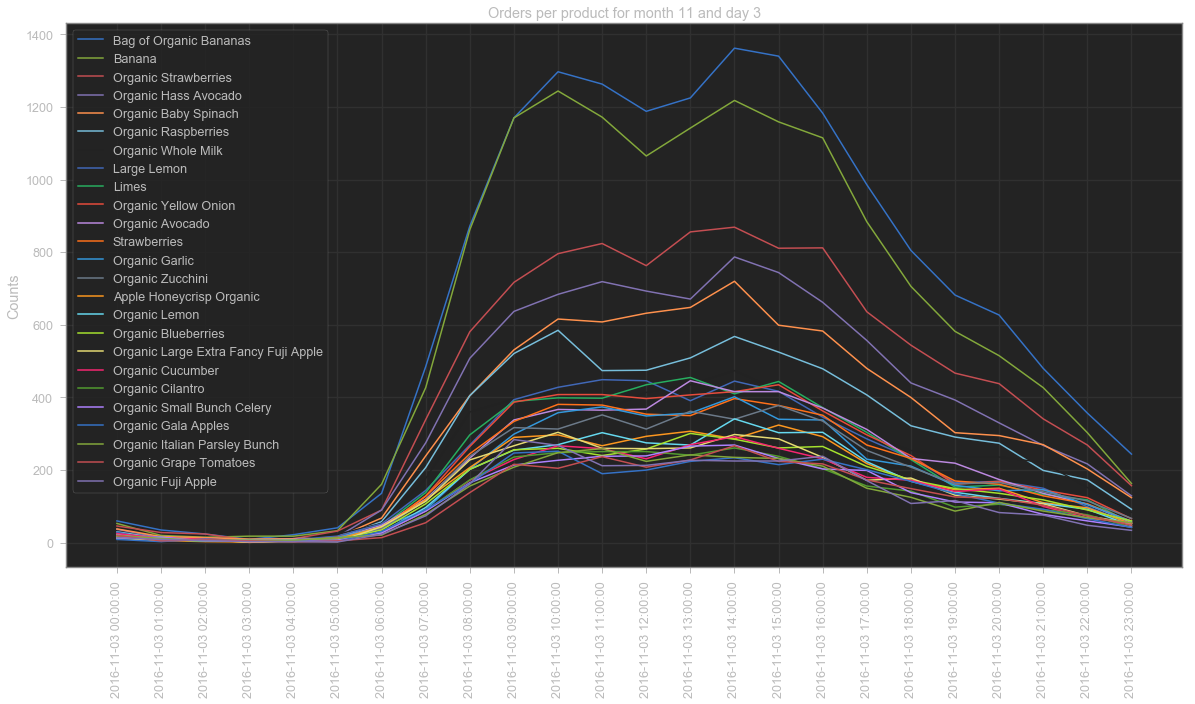

In [110]:
# Agregate
df_orders_day_details = df_orders_day.merge(df_order_products_prior, on='order_id', how='left').merge(df_products, on='product_id', how='left')
df_tmp = df_orders_day_details.groupby(['product_id', 'order_date']).agg(order_count=('order_id', 'count')).reset_index()
df_tmp = df_tmp.merge(df_products, how='left', on='product_id')

# df_tmp['average_sells'] = df_tmp.apply(lambda row: row['order_count']/row['orders_per_product_prior'], axis=1)

# popular_products = list(df_tmp.groupby('product_id').agg(order_sum=('average_sells', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['product_id'].values)[:25]

popular_products = list(df_tmp.groupby('product_id').agg(order_sum=('order_count', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['product_id'].values)[:25]

print('25 most puopular products: {}'.format(popular_products))
df_tmp.head()

plot_products(df_tmp, popular_products, 'Counts', 'Orders per product for month 11 and day 3')

#### Moving interval

In [117]:
# login_date = datetime.datetime(year=int(2016), month=int(11), day=int(3), hour=int(13), minute=int(30))
# print(login_date)
# df_orders_sliced = orders_around_interval_of_length(df_orders.set_index('order_date'), login_date, interval_length=2)
# df_orders_sliced.head()

In [114]:
# df_orders_sliced= df_orders_sliced.reset_index()
# df_orders_sliced.head()

##### Popular departments

In [118]:
# #Cut out hour 
# df_orders_sliced['order_date'] = pd.to_datetime(df_orders_sliced['order_date']).dt.date
# # Agregate
# df_orders_sliced_details = df_orders_sliced.merge(df_order_products_prior, on='order_id', how='left').merge(df_products, on='product_id', how='left')
# df_tmp = df_orders_sliced_details.groupby(['department_id', 'order_date']).agg(order_count=('order_id', 'count')).reset_index()
# df_tmp = df_tmp.merge(df_departments, how='left', on='department_id')
# # df_tmp = df_tmp.sort_values(by=['order_count'], ascending=False)

# df_tmp['average_sells'] = df_tmp.apply(lambda row: row['order_count']/row['orders_per_department_prior'], axis=1)
# df_tmp.head()
# popular_departments= list(df_tmp.groupby('department_id').agg(order_sum=('average_sells', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['department_id'].values)[:10]


# # popular_departments= list(df_tmp.groupby('department_id').agg(order_sum=('order_count', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['department_id'].values)[:10]
# print('10 most puopular departments: {}'.format(popular_departments))

# plot_departments(df_tmp, popular_departments, 'Counts',  'Orders per department for moving interval')

##### Popular products

In [119]:
#Cut out hour 
# df_orders_sliced['order_date'] = pd.to_datetime(df_orders_sliced['order_date']).dt.date
# # Aggregate
# df_orders_sliced_details = df_orders_sliced.merge(df_order_products_prior, on='order_id', how='left').merge(df_products, on='product_id', how='left')
# df_tmp = df_orders_sliced_details.groupby(['product_id', 'order_date']).agg(order_count=('order_id', 'count')).reset_index()
# df_tmp = df_tmp.merge(df_products, how='left', on='product_id')

# popular_products = list(df_tmp.groupby('product_id').agg(order_sum=('order_count', 'sum')).sort_values(by=['order_sum'], ascending=False).reset_index()['product_id'].values)[:25]
# print('25 most puopular products: {}'.format(popular_products))
# df_tmp.head()

# plot_products(df_tmp, popular_products, 'Counts',  'Orders per product for moving interval')

## Orders

In this section we will look at the orders more in detail

In [120]:
df_order_products = df_order_products_train
df_order_products.head()
df_orders_filtered = df_orders.loc[df_orders['eval_set']=='train']
df_orders_filtered.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences
0,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...
1,857644,69792,train,4,0,0,29.0,2016-04-01 00:00:00,13,organicavocado_47766 shreddedparmesan_4799 unc...
2,2379808,193128,train,4,6,0,0.0,2016-04-01 00:00:00,13,9paperplate_19779 classicmixvariety_19734
3,274779,35031,train,4,2,0,0.0,2016-04-01 00:00:00,13,schoolsafechocolatecupcakes_28489 organicwhole...
4,91799,62272,train,4,1,1,0.0,2016-04-01 01:00:00,13,organicwholewheatelbows_283 ripelargepittedoli...


In [121]:
# Let's define this dataframe her, we will feature engineer on top of it
df_order_details = df_orders_filtered.merge(df_order_products, on='order_id', how='left').merge(df_products, on='product_id', how='left')

Choose evaluation set in order to explore the orders in each one of the 'eval_set' (prior and train). The notebook will be set to train but if the values bellow are changed the corresponding statistical mechanisms will be performed to the order/product relationships in each set .

### Which products are the most frequently ordered?

Let's see how many orders we have per product

Best selling products. 

Dtaframe shape: (39123, 9) 

       orders_per_product            product_name
19574               18726                  Banana
10367               15480  Bag of Organic Bananas
16685               10894    Organic Strawberries
17300                9784    Organic Baby Spinach
37499                8135             Large Lemon
37609                7409         Organic Avocado
37164                7293    Organic Hass Avocado
13228                6494            Strawberries
20648                6033                   Limes
22024                5546     Organic Raspberries


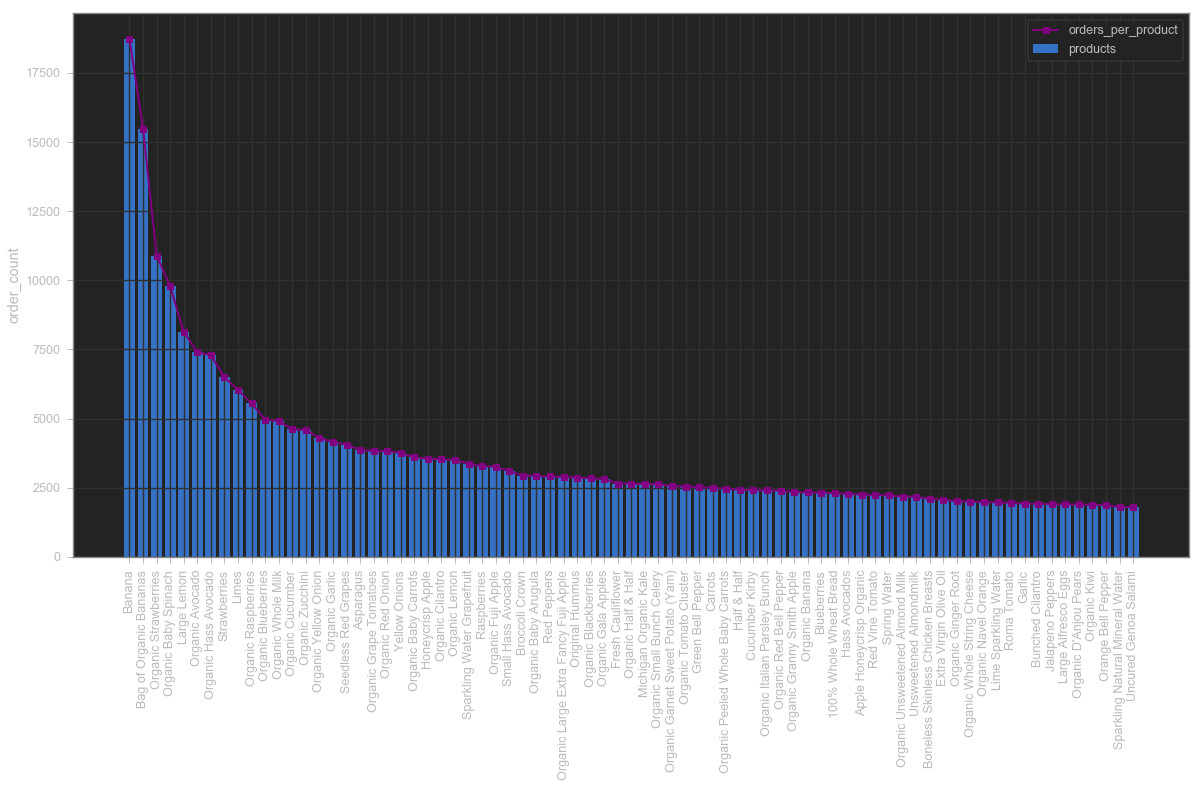

In [122]:
print('Best selling products. \n')

def get_best_sellers(df_order_products):
    df_bestsellers = df_order_products.groupby(['product_id']).agg(orders_per_product=('order_id', 'count')).merge(df_products, how='left', on='product_id').reset_index()
    return df_bestsellers.sort_values(by=['orders_per_product'], ascending=False)

df_bestsellers = get_best_sellers(df_order_products)

print('Dtaframe shape: {} \n'.format(df_bestsellers.shape))
print(df_bestsellers[['orders_per_product', 'product_name']].head(10))

create_bar_chart(df_bestsellers['product_name'][:75], df_bestsellers['orders_per_product'][:75], 'products', 'order_count')

Observations 
- 75 best selling products and the number of times each product was ordered
- The most ordered product is 'Banana' belonging to 18726 orders, it is followed by 'Bag of Organic Bananas' with 15480
- The least ordered product is 'Organic Raspberries' belonging to 5546 orders
- This data is VERY skewed to the right. 

#### Feature engineering : product_sequences 

Let's extract the product sequences for each order into sentences. Each sentence will be a string and each product name a word in the sentence. This will allow us to do TFIDF approaches for product frequency.

In [123]:
%%time
def extract_product_sequences_for_orders(df_orders, df_products, df_order_products):
    print('Working with {} orders'.format(df_orders.shape[0]))
    # Merge product details into orders slice
    df_order_products_tmp = df_orders.reset_index().merge(df_order_products, on='order_id', how='left').merge(df_products, how='left', on='product_id')
    print('Working with {} products'.format(df_order_products_tmp.shape[0]))
    print('Average number of item in order: {}'.format(df_order_products_tmp.shape[0]/df_orders.shape[0]))
    # Grab relevant columns
    df_order_products_tmp = df_order_products_tmp[['order_id', 'product_id', 'product_name_encoded']]
    # Group by order_id and concatenate the products sequences into one string for each order. Rename to product_sequences
    df_tmp = df_order_products_tmp.groupby(['order_id'])['product_name_encoded'].apply(' '.join).reset_index().rename(columns={"product_name_encoded": "product_sequences"})
    # Merge the 
    df_orders_new = df_orders.merge(df_tmp, on='order_id', how='left')
    
    return df_orders_new

CPU times: user 4 µs, sys: 1e+03 ns, total: 5 µs
Wall time: 5.96 µs


In [124]:
%%time
if path.exists('data/enhanced/df_orders.csv') == False:
    # Extract product sequences for train orders
    df_orders_train_new =  extract_product_sequences_for_orders(df_orders_train, df_products, df_order_products_train)
    # Extract product sequences for test orders
    df_orders_prior_new =  extract_product_sequences_for_orders(df_orders_prior, df_products, df_order_products_prior)
    # Set product_sequences to Nan for test data
    df_orders_test['product_sequences'] = np.nan
    # Concatenate datasets to recreate df_orders
    df_orders_final = pd.concat([df_orders_train_new, df_orders_prior_new, df_orders_test])
    # Make sure that the new dataset we built has the same order oas the original df_orders
    assert df_orders.shape[0] == (df_orders_train_new.shape[0] + df_orders_prior_new.shape[0] + df_orders_test.shape[0])
    # Save to disk
    df_orders_final.to_csv('data/enhanced/df_orders.csv', index = None, header=True)
else:
    # Otherwise load the data
    df_orders = pd.read_csv('data/enhanced/df_orders.csv').sort_values(by=['order_date'], ascending=True)

<string>:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 19 s, sys: 2.63 s, total: 21.6 s
Wall time: 17.8 s


#### Feature engineering : orders_per_product

Let's create a feature that will sore the amount of orders per product for each one of the evaluation sets.

In [125]:
df_products_new = df_products.merge(get_best_sellers(df_order_products_train)[['product_id', 'orders_per_product']], how='left', on='product_id')
df_products_new = df_products_new.rename(columns={"orders_per_product": "orders_per_product_train"})

df_products = df_products_new.merge(get_best_sellers(df_order_products_prior)[['product_id', 'orders_per_product']], how='left', on='product_id')
df_products = df_products.rename(columns={"orders_per_product": "orders_per_product_prior"})
df_products.head()


,product_id,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,orders_per_product_train,orders_per_product_prior
0,1,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1,76.0,1852.0
1,2,All-Seasons Salt,104,13,4.0,90.0,allseasonssalt_2,4.0,90.0
2,3,Robust Golden Unsweetened Oolong Tea,94,7,6.0,277.0,robustgoldenunsweetenedoolongtea_3,6.0,277.0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,22.0,329.0,smartonesclassicfavoritesminirigatoniwithvodka...,22.0,329.0
4,5,Green Chile Anytime Sauce,5,13,1.0,15.0,greenchileanytimesauce_5,1.0,15.0


Observations:
- There are many more orders for the prior evaluation set. (Which makes sense)

### Outliers

Some product like clearly 'bananas' are items that are ordered with great frequency. If a product frequency approach is taken in order to recommend products these items with above average frequency should be seen as outliers.

In [126]:
# Merge bestellers into order_products so we keep 'orders_per_product' for later use
# df_order_products = df_order_products.merge(df_bestsellers, how='left', on='product_id')
df_bestsellers['orders_per_product'].describe()
df_bestsellers.head()

count    39123.000000
mean        35.391381
std        222.533412
min          1.000000
25%          2.000000
50%          5.000000
75%         18.000000
max      18726.000000
Name: orders_per_product, dtype: float64

,index,product_id,orders_per_product,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded
19574,19574,24852,18726,Banana,24,4,18726.0,472565.0,banana_24852
10367,10367,13176,15480,Bag of Organic Bananas,24,4,15480.0,379450.0,bagoforganicbananas_13176
16685,16685,21137,10894,Organic Strawberries,24,4,10894.0,264683.0,organicstrawberries_21137
17300,17300,21903,9784,Organic Baby Spinach,123,4,9784.0,241921.0,organicbabyspinach_21903
37499,37499,47626,8135,Large Lemon,24,4,8135.0,152657.0,largelemon_47626


In [127]:
# fig, ax = plt.subplots(figsize=(15, 7))
# # df_bestsellers['product_name'][:75], df_bestsellers['orders_per_product'][:75]
# sb.violinplot(x="product_name", y="orders_per_product", data=df_bestsellers[:75], inner="quartile", bw=0.2);
# sb.swarmplot(x="product_name", y="orders_per_product", data=df_bestsellers[:75], size=5, ax=ax, color="k", alpha=0.1);

Observations:
    - In the first 25th percentile there are items that have been ordered only one or twice
    - In the last quartile represents product that have been ordered between 18 and 18726
    
Let's find the IQR and take the outliers out

In [128]:
# def filter_IQR(datset):
#     # Computing IQR
#     Q1 = datset['orders_per_product'].quantile(0.25)
#     print(Q1)
#     Q3 = datset['orders_per_product'].quantile(0.75)
#     print(Q3)
#     IQR = Q3 - Q1
#     print(IQR)
#     # Filtering Values between Q1-1.5IQR and Q3+1.5IQR
#     return datset.query('(@Q1 - 1.5 * @IQR) <= orders_per_product <= (@Q3 + 1.5 * @IQR)')
   
    
# df_order_products = filter_IQR(df_order_products)

### How many products do people buy?

Let's group our products data by order id to see what patterns we can identify

For train orders: 



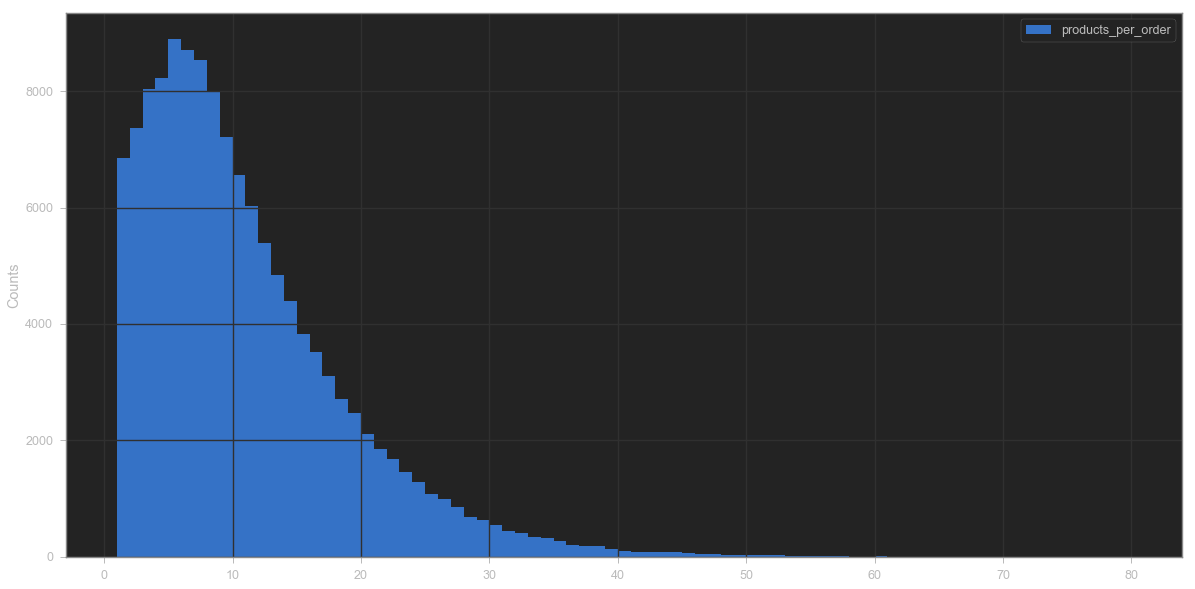

In [129]:
print('For train orders: \n')
# df_order_aggregation_train = analyze_orders_for_data(df_order_products)
df_order_aggregation_train = df_order_products.groupby(['order_id'])
df_order_aggregation_train = df_order_aggregation_train.agg(products_per_order=('add_to_cart_order', 'count')).reset_index()
df_order_aggregation_train.describe()
df_order_aggregation_train.head(10)

tmp_counts = df_order_aggregation_train['products_per_order'].values
bins = np.linspace(tmp_counts.min(), tmp_counts.max(), tmp_counts.max())
plt.hist(tmp_counts, bins=bins, label="products_per_order")
plt.legend()
plt.grid()
plt.ylabel("Counts");

Observations:
- We have a mean of 10.55 product ordered per order
- Minimum of one item ordered
- Max of 80 items ordered

### How often to people order the same thing again?

In [130]:
df_tmp_reordered = df_order_products.groupby(['reordered']).agg(count=('order_id', 'count')).reset_index()
df_tmp_reordered['proportion'] = df_tmp_reordered.apply(lambda row: row['count']/total_orders_train , axis=1)
df_tmp_reordered.head()

,reordered,count,proportion
0,0,555793,0.401406
1,1,828824,0.598594


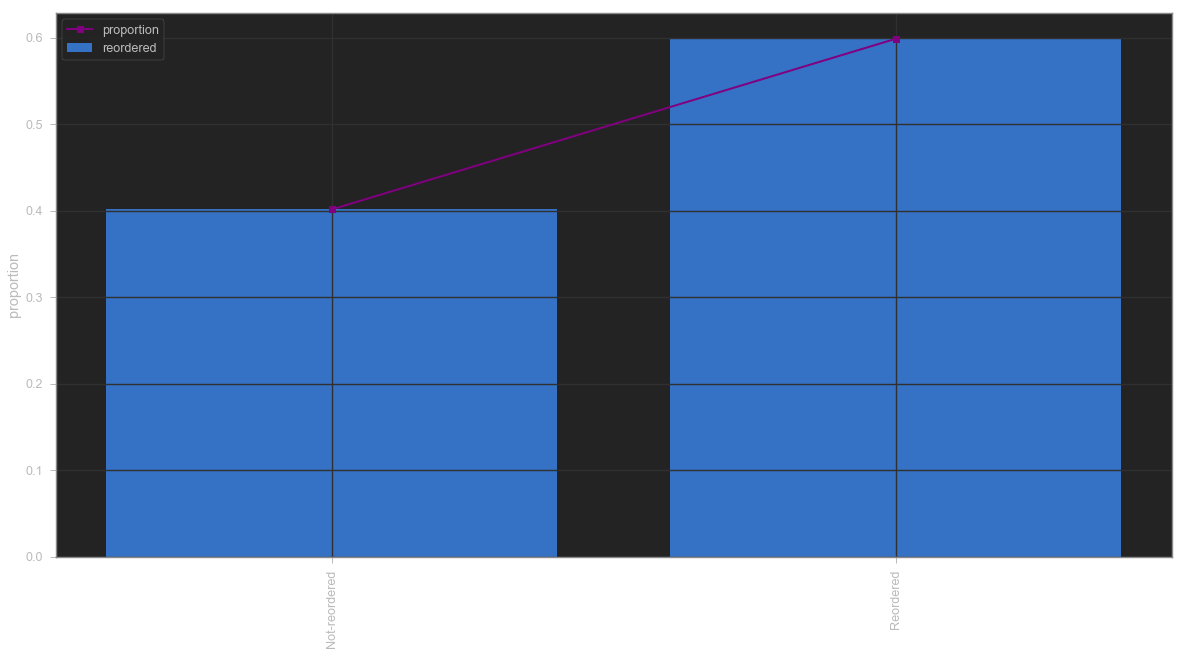

In [131]:
create_bar_chart(['Not-reordered', 'Reordered'], df_tmp_reordered['proportion'], 'reordered', 'proportion')

In [132]:
# assert total_orders_train == df_tmp_reordered['count'][0] + df_tmp_reordered['count'][1]

Observations 
- 59% of the ordered items are reorders.

### Most often reordered

In order to figure out which items where the most reordered we will compute the mean of 'reordered' for each specific product. In order for this to be fair we will have to choose a minimum size of group and only consider groups bigger than this established number. This will help us make sure that our product popularity is not biased by items that were reordered just a few times and consider them among the most reordered. We will set a minimum group size of 40 to start with and then adapt if necessary. 

In [133]:
minimum_cardinality_group = 40

df_group_orders_prod_ids = df_order_products.groupby(['product_id'])
df_tmp = df_group_orders_prod_ids.agg({'add_to_cart_order': 'count', 'reordered': 'mean'}).reset_index().merge(df_products, how='left')
df_tmp = df_tmp.rename(columns={"reordered": "proportion_reordered", 'add_to_cart_order': 'count'})
df_tmp = df_tmp.loc[df_tmp['count'] > minimum_cardinality_group]
df_tmp = df_tmp.sort_values(by=['proportion_reordered'], ascending=False)

df_tmp.head(10)

,product_id,count,proportion_reordered,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,orders_per_product_train,orders_per_product_prior
1374,1729,92,0.934783,2% Lactose Free Milk,84,16,92.0,1762.0,2lactosefreemilk_1729,92.0,1762.0
16529,20940,368,0.913043,Organic Low Fat Milk,84,16,368.0,8438.0,organiclowfatmilk_20940,368.0,8438.0
9571,12193,59,0.898305,100% Florida Orange Juice,98,7,59.0,1220.0,100floridaorangejuice_12193,59.0,1220.0
25006,31764,45,0.888889,Original Sparkling Seltzer Water Cans,115,7,45.0,1091.0,originalsparklingseltzerwatercans_31764,45.0,1091.0
16610,21038,81,0.888889,Organic Spelt Tortillas,128,3,81.0,2821.0,organicspelttortillas_21038,81.0,2821.0
19574,24852,18726,0.884172,Banana,24,4,18726.0,472565.0,banana_24852,18726.0,472565.0
100,117,120,0.883333,Petit Suisse Fruit,2,16,120.0,3636.0,petitsuissefruit_117,120.0,3636.0
30852,39180,483,0.881988,Organic Lowfat 1% Milk,84,16,483.0,14869.0,organiclowfat1milk_39180,483.0,14869.0
9723,12384,269,0.881041,Organic Lactose Free 1% Lowfat Milk,91,16,269.0,7569.0,organiclactosefree1lowfatmilk_12384,269.0,7569.0
18956,24024,461,0.878525,1% Lowfat Milk,84,16,461.0,14231.0,1lowfatmilk_24024,461.0,14231.0


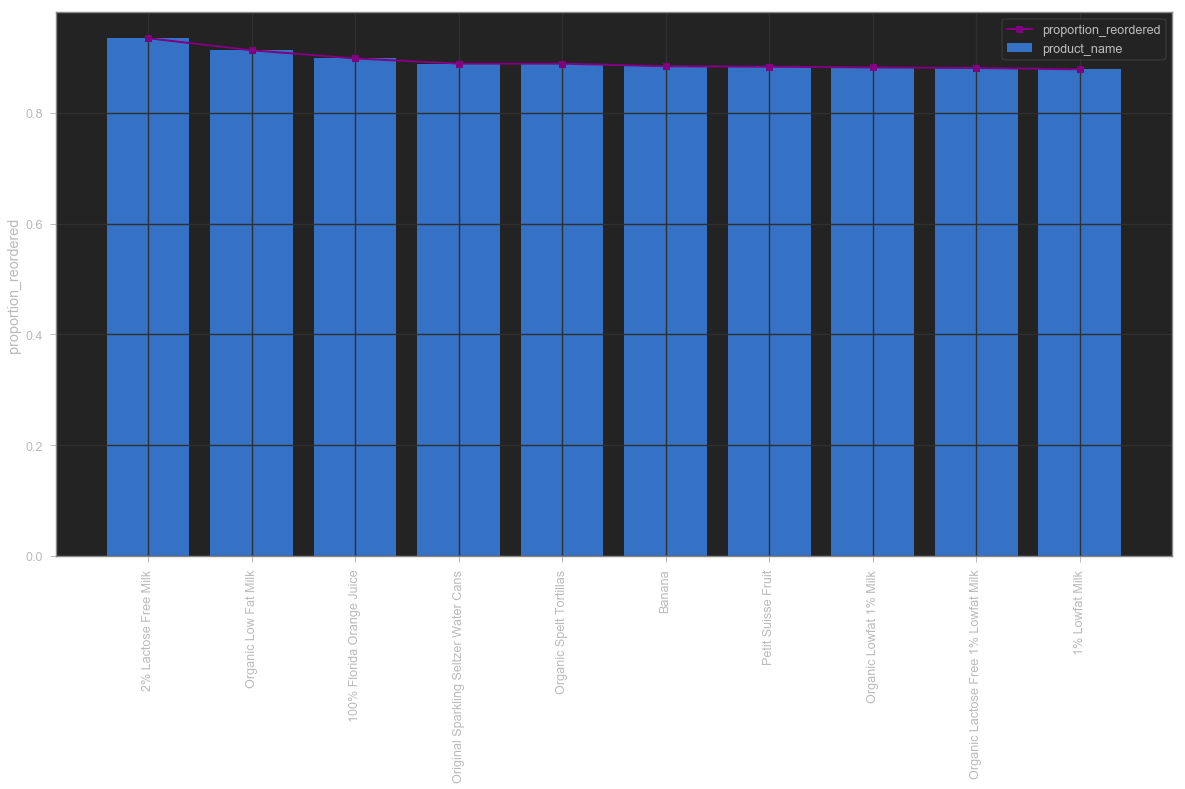

In [134]:
create_bar_chart(df_tmp['product_name'][:10], df_tmp['proportion_reordered'][:10], 'product_name', 'proportion_reordered')

Observations
- These 10 products have the highest probability of being reordered.

#### Can we do this for a specific user?
Let's write a method that will receive a user id and will return an order list that will contain the products that the user will most likely reorder. This functionality will be part of our final recommender system that will be formalized in the next notebook.

In [135]:
def most_likely_products_for_user(user_id):
    # Filter on prior orders
    df_orders_prior = df_orders.loc[df_orders['eval_set'] == 'prior']
    df_tmp = df_order_products_prior.merge(df_orders_prior, how='left', on='order_id').groupby(['user_id']).get_group(user_id)
    df_tmp2 = df_tmp.groupby(['product_id'])
    df_tmp2 = df_tmp2.agg(proportion_reordered=('reordered', 'mean'), product_count=('add_to_cart_order', 'count')).reset_index().merge(df_products, how='left')
    df_tmp2 = df_tmp2.sort_values(by=['proportion_reordered'], ascending=False)
    return df_tmp2

In [136]:
# test_user_id = 2
# df_most_likely_products_2 = most_likely_products_for_user(test_user_id)
# df_most_likely_products_2.shape
# df_most_likely_products_2.head(10)
# create_bar_chart(df_most_likely_products_2['product_name'][:10], df_most_likely_products_2['proportion_reordered'][:10], 'product_name', 'proportion_reordered')

In [137]:
# test_user_id = 112108
# df_most_likely_products_112108 = most_likely_products_for_user(test_user_id)
# df_most_likely_products_112108.shape
# df_most_likely_products_112108.head(12)
# create_bar_chart(df_most_likely_products_112108['product_name'][:10], df_most_likely_products_112108['proportion_reordered'][:10], 'product_name', 'proportion_reordered')

### Sales distribution over time

#### Sales per day of the week

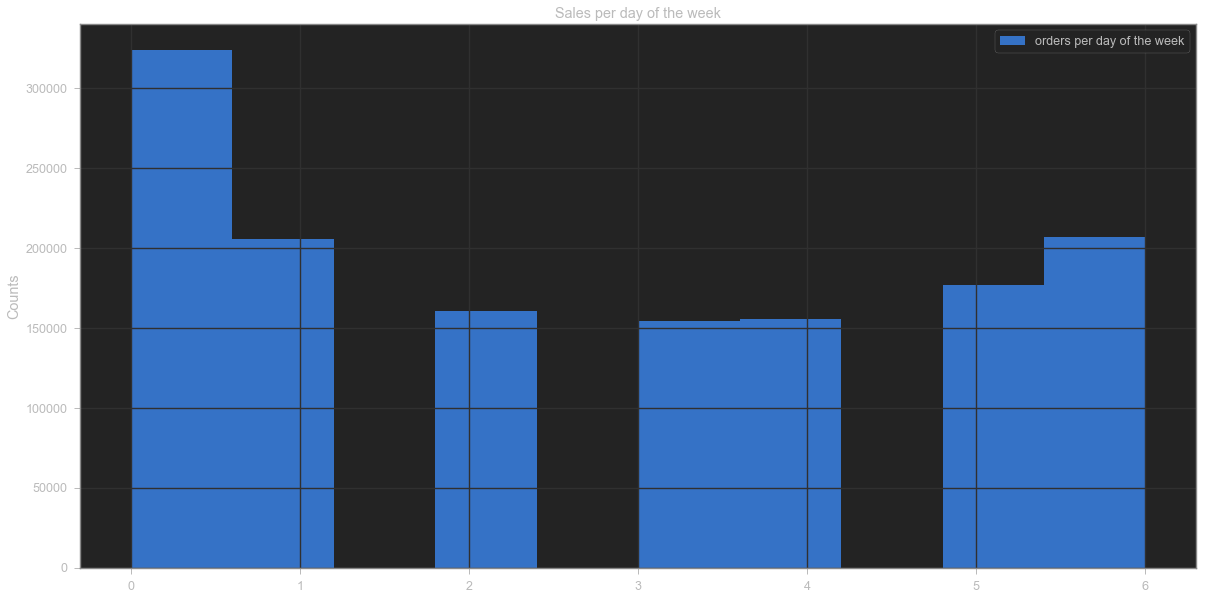

In [138]:
days_week = df_order_details['order_dow'].values
plt.hist(days_week, label="orders per day of the week", orientation='vertical')
plt.legend()
plt.grid()
plt.title('Sales per day of the week')
plt.ylabel("Counts");

Observations:
- We can see that the number of purchases done during the first two days of the week are higher than the remaining days.
- The last days are within the same range of number of purchases.
- There is a clear effect of day of the week. Most orders are on days 0 and 1. Unfortunately there is no info regarding which values represent which day, but one would assume that this is the weekend.

#### Sales per hour of the day

Let's explore our data to see when are users buying. 

count    131209.000000
mean         13.581363
std           4.221325
min           0.000000
25%          10.000000
50%          14.000000
75%          17.000000
max          23.000000
Name: order_hour_of_day, dtype: float64

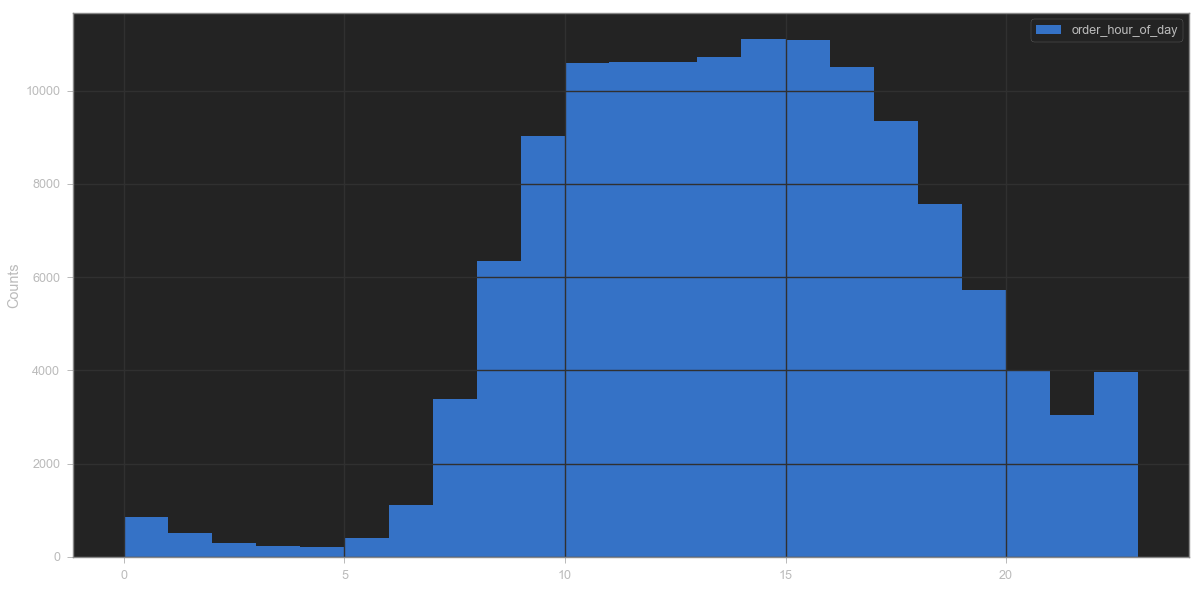

In [139]:
hours_day = df_orders_filtered['order_hour_of_day'].values
df_orders_filtered['order_hour_of_day'].describe()

bins = np.linspace(hours_day.min(), hours_day.max(), 24)
create_hist(hours_day, bins, 'order_hour_of_day', 'Counts')

Observations:
-  Most orders are between 8.00-18.00

#### Days since prior order

Let's explore days_since_prior_order

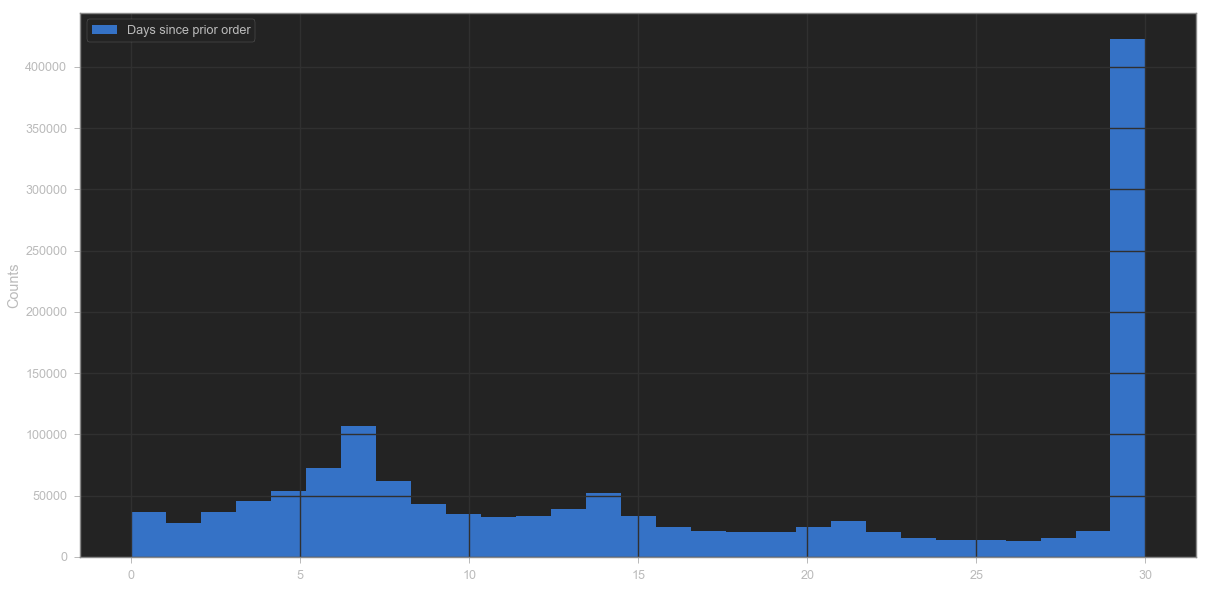

In [140]:
# Replace NaN with zero in order to be able to plot our variable
days_prior_order = df_order_details.dropna()['days_since_prior_order'].values
bins = np.linspace(days_prior_order.min(), days_prior_order.max(), days_prior_order.max())
create_hist(days_prior_order, bins, 'Days since prior order', 'Counts')

#### Department sales weekly seasonality

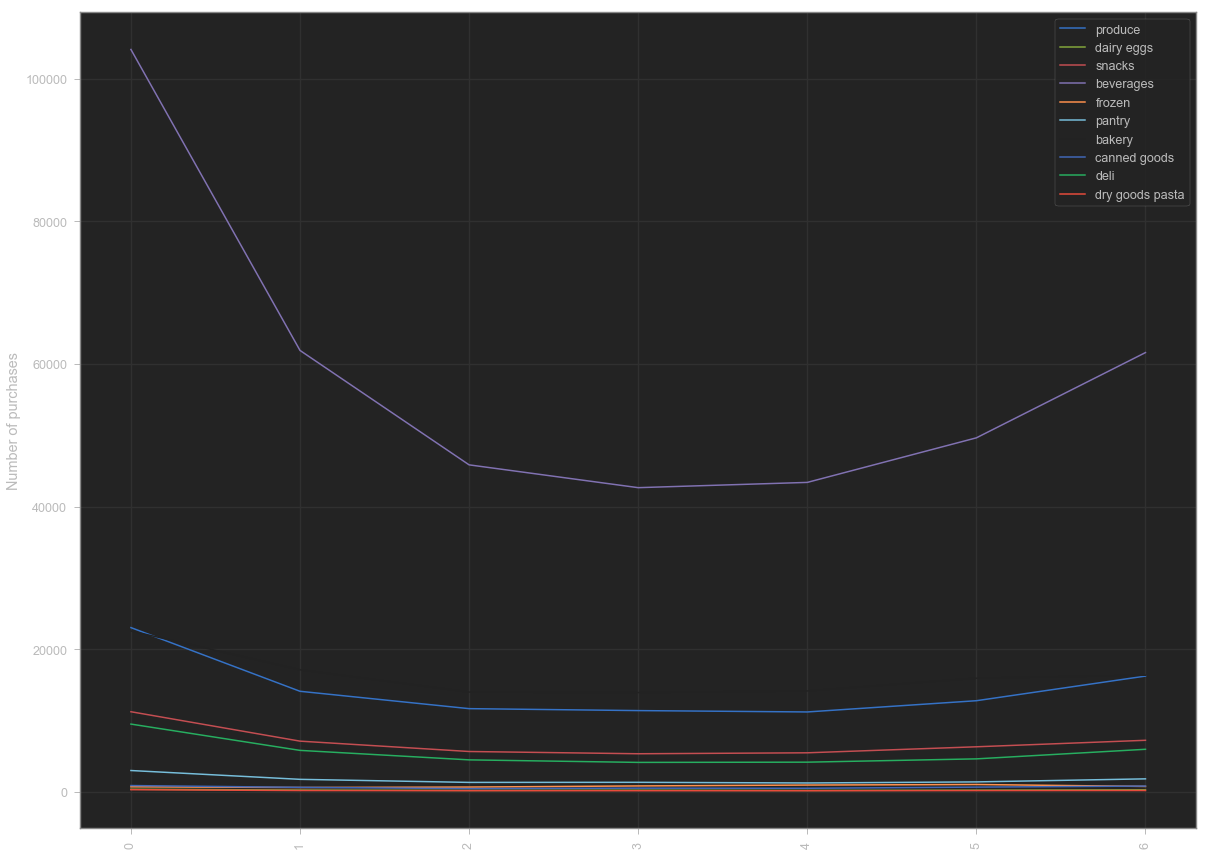

In [141]:
df_tmp = df_order_details.groupby(['department_id', 'order_dow']).agg(order_count=('order_id', 'count')).reset_index()
df_tmp = df_tmp.merge(df_departments, how='left', on='department_id') #.sort_values(by=['order_count'], ascending=True)

plt.rcParams['figure.figsize'] = [20, 15]
plt.xticks(rotation=90)

for i, department_id in enumerate(df_departments.sort_values(by=['orders_per_department_train'], ascending=False)['department'].values[:10]):
    plt.plot(df_tmp[df_tmp['department_id']==i+1]['order_dow'], df_tmp[df_tmp['department_id']==i+1]['order_count'], label=department_id)

plt.legend()
plt.grid()
plt.ylabel("Number of purchases");

In [151]:
df_products.sort_values(by=['orders_per_product_train'], ascending=False)

,product_id,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded
24851,24852,Banana,24,4,18726.0,472565.0,banana_24852
13175,13176,Bag of Organic Bananas,24,4,15480.0,379450.0,bagoforganicbananas_13176
21136,21137,Organic Strawberries,24,4,10894.0,264683.0,organicstrawberries_21137
21902,21903,Organic Baby Spinach,123,4,9784.0,241921.0,organicbabyspinach_21903
47625,47626,Large Lemon,24,4,8135.0,152657.0,largelemon_47626
...,...,...,...,...,...,...,...
49665,49666,Ginger Snaps Snacking Cookies,61,19,NaN,5.0,gingersnapssnackingcookies_49666
49668,49669,K Cup Dark Blend,100,21,NaN,7.0,kcupdarkblend_49669
49672,49673,Stone Baked Multi Grain Artisan Rolls,129,1,NaN,26.0,stonebakedmultigrainartisanrolls_49673
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,NaN,9.0,vodkatripledistilledtwistofvanilla_49684


#### Department sales daily seasonality 

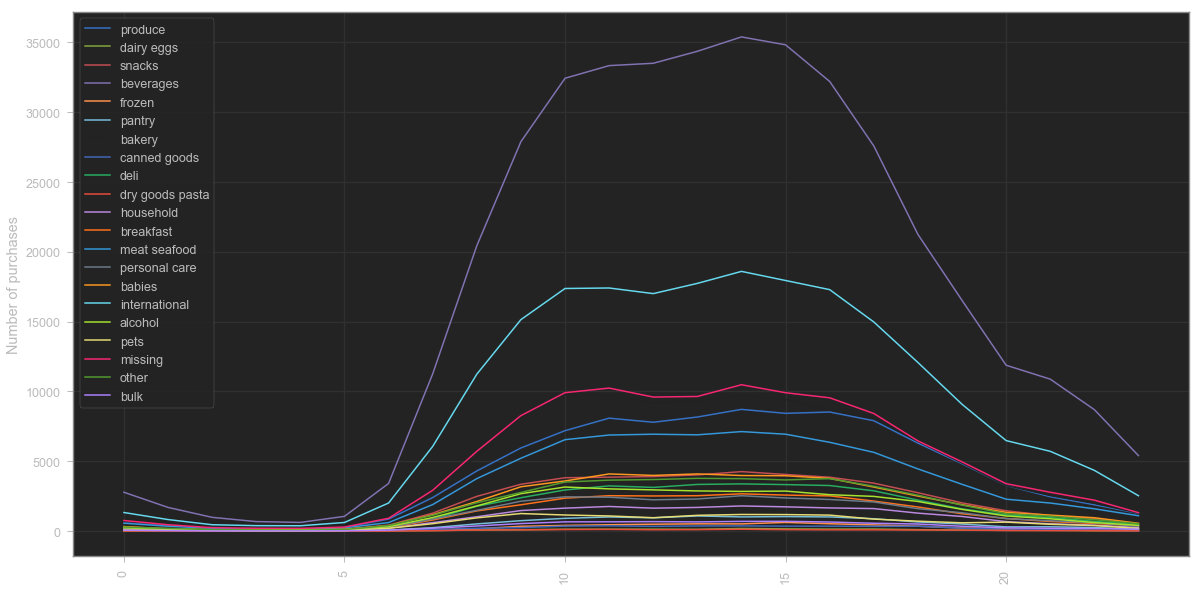

In [152]:
df_tmp = df_order_details.groupby(['department_id', 'order_hour_of_day']).agg(order_count=('order_id', 'count')).reset_index()
df_tmp = df_tmp.merge(df_departments, how='left', on='department_id')
df_tmp.head()

plt.rcParams['figure.figsize'] = [20, 10]
plt.xticks(rotation=90)

for i, department_id in enumerate(df_departments['department'].values):
    plt.plot(df_tmp[df_tmp['department_id']==i+1]['order_hour_of_day'], df_tmp[df_tmp['department_id']==i+1]['order_count'], label=department_id)

plt.legend()
plt.grid()
plt.ylabel("Number of purchases");

Observations:
- The graph above shows how sales distribute over time of the day for each one of the departments.

In [153]:


# df_products.drop('orders_per_product_train', axis=1, inplace=True)

df_products.head()

,product_id,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded
0,1,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
1,2,All-Seasons Salt,104,13,4.0,90.0,allseasonssalt_2
2,3,Robust Golden Unsweetened Oolong Tea,94,7,6.0,277.0,robustgoldenunsweetenedoolongtea_3
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,22.0,329.0,smartonesclassicfavoritesminirigatoniwithvodka...
4,5,Green Chile Anytime Sauce,5,13,1.0,15.0,greenchileanytimesauce_5


#### Product sales weekly seasonality 

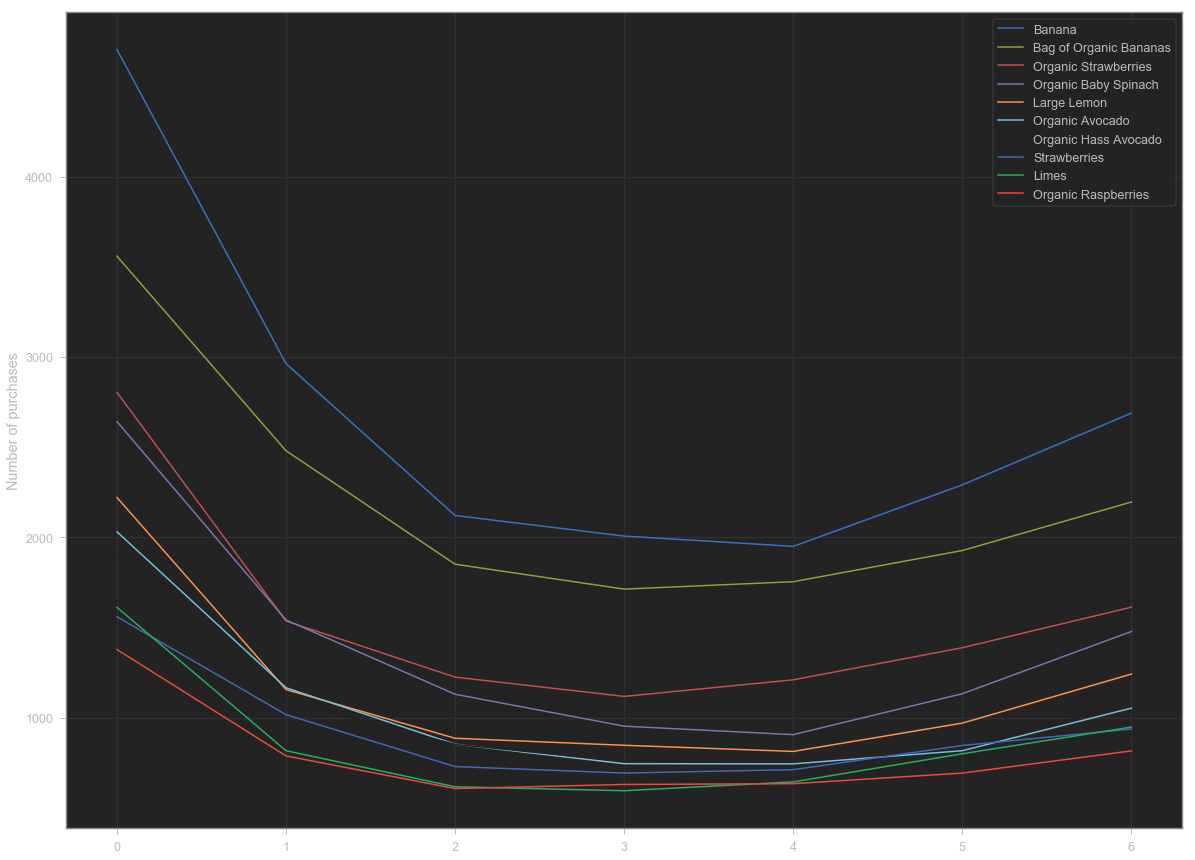

In [154]:
df_tmp = df_order_details.groupby(['product_id', 'order_dow']).agg(order_count=('product_id', 'count')).reset_index()
df_tmp = df_tmp.merge(df_products, how='left', on='product_id') #.sort_values(by=['order_count'], ascending=True)

plt.rcParams['figure.figsize'] = [20, 15]

for product_id in df_products.sort_values(by=['orders_per_product_train'], ascending=False)['product_id'].values[:10]:
    x = df_tmp[df_tmp['product_id']==product_id]['order_dow']
    y = df_tmp[df_tmp['product_id']==product_id]['order_count']
    product_name = df_tmp[df_tmp['product_id']==product_id]['product_name'].values[0]
    plt.plot(x, y, label=product_name)

plt.legend()
plt.grid()
plt.ylabel("Number of purchases");

#### Product sales daily seasonality 

   product_id  order_hour_of_day  order_count                product_name  \
0           1                  1            1  Chocolate Sandwich Cookies   
1           1                  6            1  Chocolate Sandwich Cookies   
2           1                  7            1  Chocolate Sandwich Cookies   
3           1                  8            1  Chocolate Sandwich Cookies   
4           1                  9            9  Chocolate Sandwich Cookies   

   aisle_id  department_id  orders_per_product_train  \
0        61             19                      76.0   
1        61             19                      76.0   
2        61             19                      76.0   
3        61             19                      76.0   
4        61             19                      76.0   

   orders_per_product_prior        product_name_encoded  
0                    1852.0  chocolatesandwichcookies_1  
1                    1852.0  chocolatesandwichcookies_1  
2                    1852.

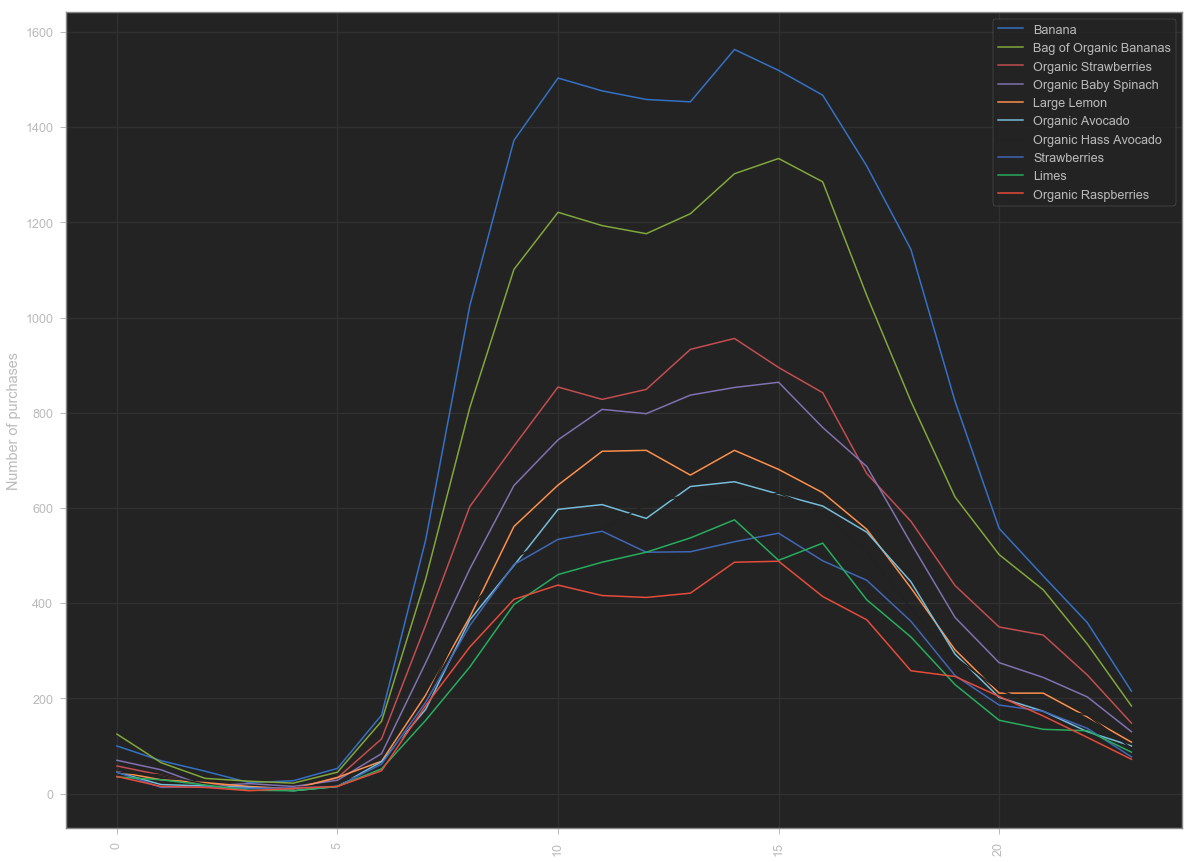

In [155]:
df_tmp = df_order_details.groupby(['product_id', 'order_hour_of_day']).agg(order_count=('product_id', 'count')).reset_index()
# print(df_tmp.head())
df_tmp = df_tmp.merge(df_products, how='left', on='product_id') #.sort_values(by=['order_count'], ascending=True)
print(df_tmp.head())

plt.rcParams['figure.figsize'] = [20, 15]
plt.xticks(rotation=90)

for product_id in df_products.sort_values(by=['orders_per_product_train'], ascending=False)['product_id'].values[:10]:
    x = df_tmp[df_tmp['product_id']==product_id]['order_hour_of_day']
    y = df_tmp[df_tmp['product_id']==product_id]['order_count']
    product_name = df_tmp[df_tmp['product_id']==product_id]['product_name'].values[0]
    plt.plot(x, y, label=product_name)

plt.legend()
plt.grid()
plt.ylabel("Number of purchases");


#### How do orders distribute over time

In [156]:
def product_distribution_over_time(product_id):
    product_name = df_products.loc[df_products['product_id']==product_id]['product_name'].values[0]
    print('Analizing distribution over time of orders for product: {}'.format(product_name))

    df_tmp = df_order_details[df_order_details['product_id']==product_id]
    df_tmp = df_tmp.groupby(['order_dow', 'order_hour_of_day']).agg(product_orders_dow = ('order_id', 'count')).reset_index()
    print(df_tmp.head())

    plt.rcParams['figure.figsize'] = [20, 15]
    for order_dow in range(24):
        x = df_tmp.loc[df_tmp['order_dow']==order_dow]['order_hour_of_day']
        y = df_tmp.loc[df_tmp['order_dow']==order_dow]['product_orders_dow']
        plt.plot(x, y, label='Day: {}'.format(order_dow))

    plt.legend()
    plt.grid()
    plt.title(product_name)
    plt.xlabel("Hours of day");
    plt.ylabel("Number of purchases per hour");

Analizing distribution over time of orders for product: Banana
   order_dow  order_hour_of_day  product_orders_dow
0          0                  0                  20
1          0                  1                  13
2          0                  2                  16
3          0                  3                   4
4          0                  4                   5


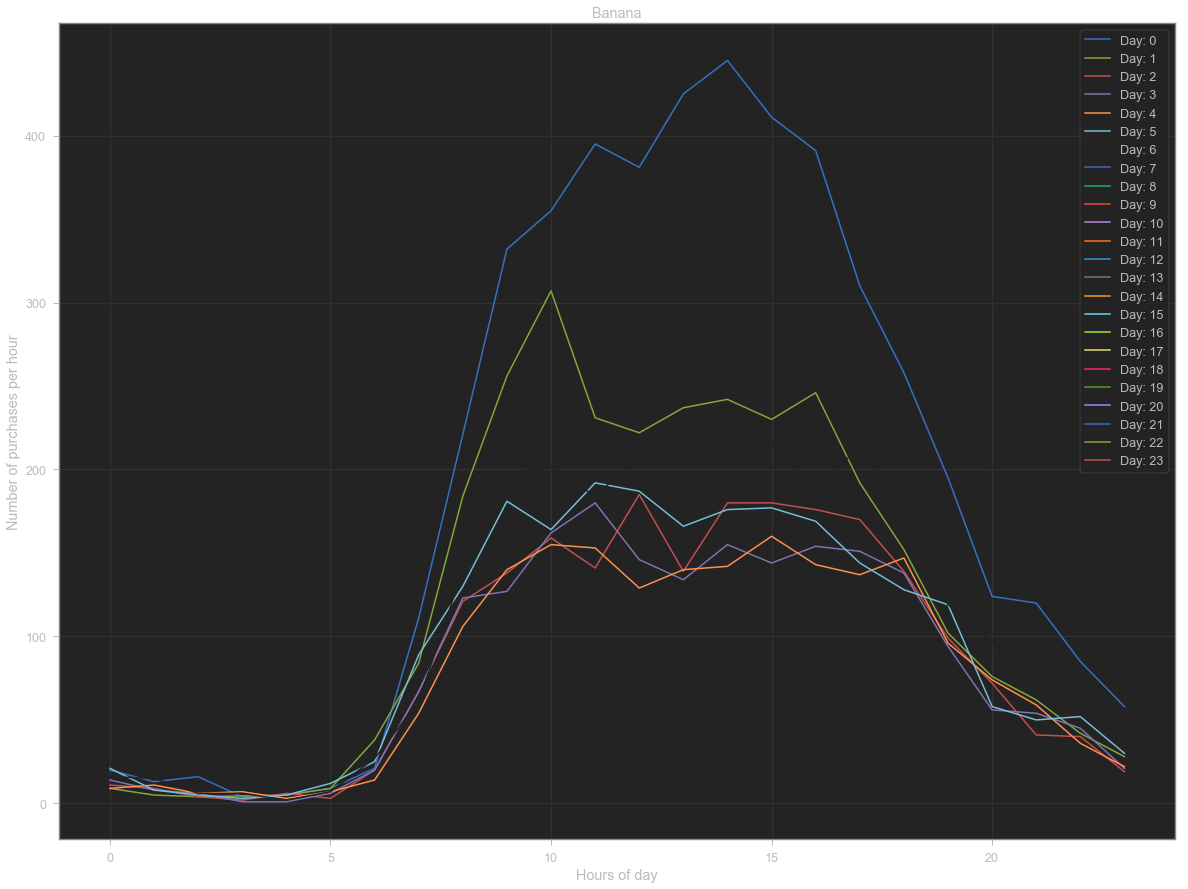

In [157]:
# Sample products:  1 , 24852, 23261 With only one row : 31723, 23261
sample_product = 24852
product_distribution_over_time(sample_product)

##### Feature engineering :  average_p_orders_dow and average_p_orders_hod

We will create two new features that will store the average of each product orders for each day of the week and the average for each product orders for every hour of the day. 


In [158]:
def order_percentage_day_and_hour(dataframe):
    """
    Creates dataframes that contain the average number of sales for each product by hours and days respectively
    param -> dataframe : Dataframe that conatins the order data to be agreagated. (df_order_details depending on eval_set)
    return -> df_temp_ohd : Average orders per hour for each product
    return -> df_temp_odw : Average orders per day for each product
    """
    total_numer_of_days = 7
    total_numer_of_hours = 24

    df_temp = df_order_details.groupby(['product_id', 'order_dow', 'order_hour_of_day']).agg(product_orders_both = ('order_id', 'count')).reset_index()
    df_temp.head()

    df_temp_ohd = df_temp.groupby(['product_id','order_hour_of_day']).agg(product_orders_dow_sum = ('product_orders_both', 'sum')).reset_index()
    df_temp_ohd['average_p_orders_dow'] = df_temp_ohd.apply(lambda row : row['product_orders_dow_sum']/total_numer_of_days, axis=1)

    df_temp_odw= df_temp.groupby(['product_id', 'order_dow']).agg(product_orders_hod_sum = ('product_orders_both', 'sum')).reset_index()
    df_temp_odw['average_p_orders_hod'] = df_temp_odw.apply(lambda row : row['product_orders_hod_sum']/total_numer_of_hours, axis=1)
    
    return df_temp_ohd, df_temp_odw

In [159]:
# Feature engineer on testing set
df_order_details_train = df_orders.loc[df_orders['eval_set']=='train'].merge(df_order_products_train, on='order_id', how='left').merge(df_products, on='product_id', how='left')
df_temp_ohd_train, df_temp_odw_train = order_percentage_day_and_hour(df_order_details_train)

df_order_details_tmp = df_order_details.merge(df_temp_ohd_train, how='left', on=['product_id', 'order_hour_of_day'])
df_order_details = df_order_details_tmp.merge(df_temp_odw_train, how='left', on=['product_id', 'order_dow'])
df_order_details.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences,...,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,product_orders_dow_sum,average_p_orders_dow,product_orders_hod_sum,average_p_orders_hod
0,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...,...,Bunched Cilantro,16,4,1920.0,45530.0,bunchedcilantro_28842,16,2.285714,179,7.458333
1,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...,...,Red Vine Tomato,83,4,2234.0,54409.0,redvinetomato_34969,15,2.142857,226,9.416667
2,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...,...,Cola,77,7,565.0,11585.0,cola_47141,4,0.571429,62,2.583333
3,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...,...,Organic Grade A Free Range Large Brown Eggs,86,16,1767.0,40045.0,organicgradeafreerangelargebrowneggs_18465,15,2.142857,184,7.666667
4,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...,...,Baked Beans,59,15,195.0,4693.0,bakedbeans_32717,5,0.714286,17,0.708333


In [160]:
## TODO: Reorder columns at some point

# print(df_order_details.columns)

# Index(['days_since_prior_order', 'product_id',
#        'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
#        'department_id', 'product_orders_dow_sum', 'average_p_orders_dow',
#        'product_orders_hod_sum', 'average_p_orders_hod'],
#       dtype='object')

# df_order_details[['order_id', 'user_id', 'product_id', 'eval_set', 'order_number', 'order_dow','order_hour_of_day',]]

In [161]:
# df_order_details.loc[df_order_details['average_p_orders_hod']]
df_order_details.sort_values(by=['average_p_orders_hod'], ascending=False).head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences,...,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,product_orders_dow_sum,average_p_orders_dow,product_orders_hod_sum,average_p_orders_hod
834445,2607052,127117,train,51,0,16,2.0,2016-11-03 16:00:00,44,banana_24852 organicunsweetenedvanillaalmondmi...,...,Banana,24,4,18726.0,472565.0,banana_24852,1467,209.571429,4705,196.041667
815939,1589225,134891,train,11,0,18,30.0,2016-11-02 18:00:00,44,classicwheatbread_12218 banana_24852 premiumsw...,...,Banana,24,4,18726.0,472565.0,banana_24852,1143,163.285714,4705,196.041667
467217,3333693,58532,train,7,0,18,27.0,2016-07-28 18:00:00,30,organicreducedfatmilk_38689 banana_24852 yogur...,...,Banana,24,4,18726.0,472565.0,banana_24852,1143,163.285714,4705,196.041667
1152990,1362769,16556,train,16,0,10,11.0,2016-11-12 10:00:00,45,organicsmallbunchcelery_44359 flatparsleybunch...,...,Banana,24,4,18726.0,472565.0,banana_24852,1503,214.714286,4705,196.041667
646393,777070,198505,train,10,0,18,7.0,2016-10-08 18:00:00,40,banana_24852 babyswissslicescheese_46313 honey...,...,Banana,24,4,18726.0,472565.0,banana_24852,1143,163.285714,4705,196.041667
442153,351804,100573,train,7,0,12,12.0,2016-07-13 12:00:00,28,sesamestreetorganicminiblueberrypancakes_47616...,...,Banana,24,4,18726.0,472565.0,banana_24852,1458,208.285714,4705,196.041667
333018,903778,93648,train,6,0,9,7.0,2016-06-08 09:00:00,23,babyspinachsalad_20919 banana_24852 roastedgar...,...,Banana,24,4,18726.0,472565.0,banana_24852,1372,196.000000,4705,196.041667
849485,2731309,201584,train,29,0,11,3.0,2016-11-04 11:00:00,44,organicstrawberries_21137 banana_24852 organic...,...,Banana,24,4,18726.0,472565.0,banana_24852,1476,210.857143,4705,196.041667
354020,2111982,30044,train,6,0,11,14.0,2016-06-15 11:00:00,24,banana_24852 organicstrawberries_21137 nicolas...,...,Banana,24,4,18726.0,472565.0,banana_24852,1476,210.857143,4705,196.041667
508617,1427945,88579,train,8,0,9,7.0,2016-08-08 09:00:00,32,banana_24852 honeycrispapple_45066 organicbaby...,...,Banana,24,4,18726.0,472565.0,banana_24852,1372,196.000000,4705,196.041667


In [162]:
df_order_details.sort_values(by=['average_p_orders_dow'], ascending=False).head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences,...,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,product_orders_dow_sum,average_p_orders_dow,product_orders_hod_sum,average_p_orders_hod
1178399,2141020,163749,train,22,1,14,12.0,2016-11-13 14:00:00,45,sugarfreeitaliansweetcremecoffeecreamer_28080 ...,...,Banana,24,4,18726.0,472565.0,banana_24852,1563,223.285714,2963,123.458333
40322,2368402,39768,train,4,1,14,30.0,2016-04-02 14:00:00,13,broccolicheddarbakemealbowl_9124 redraspberrie...,...,Banana,24,4,18726.0,472565.0,banana_24852,1563,223.285714,2963,123.458333
1114726,3041600,181327,train,24,4,14,9.0,2016-11-10 14:00:00,45,naturalspringwater_8859 organicstrawberrysmoot...,...,Banana,24,4,18726.0,472565.0,banana_24852,1563,223.285714,1950,81.250000
1263084,2927293,85582,train,12,6,14,16.0,2016-11-17 14:00:00,46,oldfashionedrolledoats_47966 banana_24852 russ...,...,Banana,24,4,18726.0,472565.0,banana_24852,1563,223.285714,2689,112.041667
1114721,274489,7165,train,14,5,14,9.0,2016-11-10 14:00:00,45,phillipsgourmetportabellamushroom_1358 asparag...,...,Banana,24,4,18726.0,472565.0,banana_24852,1563,223.285714,2291,95.458333
1114712,197365,140045,train,66,1,14,9.0,2016-11-10 14:00:00,45,organicgrannysmithapple_39877 organichothousec...,...,Banana,24,4,18726.0,472565.0,banana_24852,1563,223.285714,2963,123.458333
667702,2889730,131590,train,10,1,14,22.0,2016-10-23 14:00:00,42,banana_24852 lowfat1milk_32747 largelemon_4762...,...,Banana,24,4,18726.0,472565.0,banana_24852,1563,223.285714,2963,123.458333
1263075,469410,120725,train,22,4,14,16.0,2016-11-17 14:00:00,46,organic2reducedfatmilk_1940 15calorieslightlem...,...,Banana,24,4,18726.0,472565.0,banana_24852,1563,223.285714,1950,81.250000
1263072,2831096,122383,train,17,3,14,16.0,2016-11-17 14:00:00,46,organicwholemilkplaingreekyogurt_18980 organic...,...,Banana,24,4,18726.0,472565.0,banana_24852,1563,223.285714,2007,83.625000
732322,2673929,110307,train,23,0,14,30.0,2016-11-01 14:00:00,44,frankfurtersvegetarian_38249 organicsmallcurdc...,...,Banana,24,4,18726.0,472565.0,banana_24852,1563,223.285714,4705,196.041667


#### (Work in progress) Percent of orders per product. 
WHat is the percentage of occurrence of each order per product?


In [163]:
df_order_details.shape
df_order_details.head(5)


(1384617, 23)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences,...,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,product_orders_dow_sum,average_p_orders_dow,product_orders_hod_sum,average_p_orders_hod
0,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...,...,Bunched Cilantro,16,4,1920.0,45530.0,bunchedcilantro_28842,16,2.285714,179,7.458333
1,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...,...,Red Vine Tomato,83,4,2234.0,54409.0,redvinetomato_34969,15,2.142857,226,9.416667
2,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...,...,Cola,77,7,565.0,11585.0,cola_47141,4,0.571429,62,2.583333
3,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...,...,Organic Grade A Free Range Large Brown Eggs,86,16,1767.0,40045.0,organicgradeafreerangelargebrowneggs_18465,15,2.142857,184,7.666667
4,2236879,30088,train,4,3,0,29.0,2016-04-01 00:00:00,13,bunchedcilantro_28842 redvinetomato_34969 cola...,...,Baked Beans,59,15,195.0,4693.0,bakedbeans_32717,5,0.714286,17,0.708333


In [164]:
df_products.head()

,product_id,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded
0,1,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1
1,2,All-Seasons Salt,104,13,4.0,90.0,allseasonssalt_2
2,3,Robust Golden Unsweetened Oolong Tea,94,7,6.0,277.0,robustgoldenunsweetenedoolongtea_3
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,22.0,329.0,smartonesclassicfavoritesminirigatoniwithvodka...
4,5,Green Chile Anytime Sauce,5,13,1.0,15.0,greenchileanytimesauce_5


In [165]:
df_products.to_csv('data/enhanced/df_products.csv', index = None, header=True)

In [200]:
# Compute the total amount of orders for each product in every hour
# df_orders_per_hour = df_order_details.groupby(['product_id', 'order_hour_of_day']).agg(product_orders_per_hour=('product_id', 'count')).reset_index()
# df_orders_per_hour = df_orders_per_hour.sort_values(by=['product_orders_per_hour'], ascending=False)
# # df_orders_per_hour.shape
# # df_orders_per_hour.head()
# # Merge into df_order_details
# df_orders_hod = df_order_details.merge(df_orders_per_hour, how='left', on=['product_id', 'order_hour_of_day'])

# # Compute total orders in each hour
# df_orders_per_hour_sum = df_orders_per_hour.groupby('order_hour_of_day').agg(total_orders_hod = ('product_id', 'count')).reset_index()
# df_orders_per_hour_sum = df_orders_per_hour_sum.sort_values(by=['total_orders_hod'], ascending=False)
# # df_orders_per_hour_sum.shape
# # df_orders_per_hour_sum.head()
# # Merge into df_order_details
# df_orders_hod = df_orders_hod.merge(df_orders_per_hour_sum, how='left', on=['order_hour_of_day'])

# # # Merge df_products[['product_id', 'orders_per_product_train'] into df_order_details so we keep the feature
# df_orders_hod = df_orders_hod.merge(df_products[['product_id', 'orders_per_product_train']], how='left', on='product_id')

# df_orders_hod['avg_po_opp'] = df_orders_hod.apply(lambda row: row['average_p_orders_hod']/row['orders_per_product_train'], axis=1) 
# # df_orders_hod['avg_po_tohod'] = df_orders_hod.apply(lambda row: row['average_p_orders_hod']/row['total_orders_hod'], axis=1) # THIS return BANANAS!!!!
# df_orders_hod['morning'] = df_orders_hod.apply(lambda row: row['order_hour_of_day'] < 12, axis=1)
# df_orders_hod = df_orders_hod.sort_values(by=['order_hour_of_day'], ascending=True)
# df_orders_hod.head()


# Devide the number of orders for each product per hour by the number of orders of each product
# df_orders_hod['pct_orders_hour_all_prds'] = df_orders_hod.apply(lambda row: row['product_orders_per_hour']/row['orders_per_product_train'], axis=1)
# Devide the number of orders for each product per hour by total number of orders in each hour
# df_orders_hod['pct_product_orders_hour'] = df_orders_hod.apply(lambda row: row['product_orders_per_hour']/(row['total_orders_hod']), axis=1)
# df_orders_hod['pct_orders_hour_norm'] = df_orders_hod.apply(lambda row: row['product_orders_per_hour']/(row['total_orders_hod'] * row['orders_per_product_train']), axis=1)


In [ ]:
df_orders_hod.loc[df_orders_hod['product_id']==37842]

In [ ]:
def get_highest_ranking_products_on_feature(dataframe, feature):
    df_tmp = dataframe.sort_values(by=[feature], ascending=False).groupby('product_name').agg(maximum = (feature, 'max')).reset_index()
    return df_tmp.reset_index().sort_values(by=['maximum'], ascending=False)

df_orders_hod_morning = df_orders_hod.loc[df_orders_hod['morning'] == 1]
df_orders_hod_morning.sort_values(by=['avg_po_opp'], ascending=False).head()
df_morning_hr_products = get_highest_ranking_products_on_feature(df_orders_hod_morning, 'avg_po_opp')
df_morning_hr_products.head(25)

In [ ]:
df_order_details.loc[df_order_details['product_id']==37842]
df_orders_hod_morning.loc[df_orders_hod_morning['product_id']==37842]

In [ ]:
plt.rcParams['figure.figsize'] = [20, 15]
plt.xticks(rotation=90)

x = df_orders_hod[df_orders_hod['product_id']==sample_product]['order_hour_of_day']
y = df_orders_hod[df_orders_hod['product_id']==sample_product]['pct_orders_hour_norm']
product_name = df_tmp[df_tmp['product_id']==sample_product]['product_name'].values[0]
plt.plot(x, y, label=product_name)

# for product_id in df_orders_hod.sort_values(by=['pct_orders_hour_norm'], ascending=False)['product_id'].values[:10]:
#     x = df_orders_hod[df_orders_hod['product_id']==product_id]['order_hour_of_day']
#     y = df_orders_hod[df_orders_hod['product_id']==product_id]['pct_orders_hour_norm']
#     product_name = df_tmp[df_tmp['product_id']==product_id]['product_name'].values[0]
#     plt.plot(x, y, label=product_name)

plt.legend()
plt.grid()
plt.ylabel("Number of purchases");

In [ ]:
df_orders_hod_evening = df_orders_hod.loc[df_orders_hod['morning'] == 0]
df_orders_hod_evening.sort_values(by=['avg_po_opp'], ascending=False).head()

df_tmp = get_highest_ranking_products_on_feature(df_orders_hod_evening, 'avg_po_opp')
df_tmp.head(25)

In [ ]:
# THis return BANANAS!!!!
# df_orders_hod.sort_values(by=['avg_po_tohod'], ascending=False).head(10) 

In [ ]:
# df_orders_hod.sort_values(by=['pct_orders_hour_norm'], ascending=False)

In [185]:
# Sample products:  1 , 24852, 23261 With only one row : 31723, 23261
# sample_product_many = 24852
# df_orders_hod[df_orders_hod['product_id']==sample_product_many].shape
# df_orders_hod[df_orders_hod['product_id']==sample_product_many]

sample_product = 37842
df_orders_hod[df_orders_hod['product_id']==sample_product].shape
df_orders_hod[df_orders_hod['product_id']==sample_product]

(5, 26)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences,...,orders_per_product_train_x,orders_per_product_prior,product_name_encoded,product_orders_dow_sum,average_p_orders_dow,product_orders_hod_sum,average_p_orders_hod,product_orders_per_hour,total_orders_hod,orders_per_product_train_y
860352,828274,79306,train,24,0,16,3.0,2016-11-04 16:00:00,44,hassavocado_38739 largealfrescoeggs_11520 hint...,...,5.0,63.0,seasaltsmallcurdcottagecheese_37842,1,0.142857,5,0.208333,1,17621,5.0
1066856,1529781,78626,train,11,0,9,8.0,2016-11-09 09:00:00,45,nonfatraspberryyogurt_36865 icelandicstyleskyr...,...,5.0,63.0,seasaltsmallcurdcottagecheese_37842,1,0.142857,5,0.208333,1,15945,5.0
1081642,1655280,96993,train,20,0,13,8.0,2016-11-09 13:00:00,45,sparklinglemonwater_21709 largegradeaeggs_4417...,...,5.0,63.0,seasaltsmallcurdcottagecheese_37842,1,0.142857,5,0.208333,1,17691,5.0
1164039,1262059,90611,train,12,0,17,11.0,2016-11-12 17:00:00,45,100naturalspringwater_12606 lunchableshamchedd...,...,5.0,63.0,seasaltsmallcurdcottagecheese_37842,1,0.142857,5,0.208333,1,16961,5.0
1195895,2738690,177688,train,15,0,12,13.0,2016-11-14 12:00:00,46,bonelessskinlesschickenbreastfillets_27360 bon...,...,5.0,63.0,seasaltsmallcurdcottagecheese_37842,1,0.142857,5,0.208333,1,17646,5.0


In [186]:

# plt.rcParams['figure.figsize'] = [20, 15]
# plt.xticks(rotation=90)

# x = df_orders_hod[df_orders_hod['product_id']==sample_product]['order_hour_of_day']
# y = df_orders_hod[df_orders_hod['product_id']==sample_product]['pct_orders_hour_norm']
# product_name = df_tmp[df_tmp['product_id']==sample_product]['product_name'].values[0]
# plt.plot(x, y, label=product_name)

# # for product_id in df_orders_hod.sort_values(by=['pct_orders_hour_norm'], ascending=False)['product_id'].values[:10]:
# #     x = df_orders_hod[df_orders_hod['product_id']==product_id]['order_hour_of_day']
# #     y = df_orders_hod[df_orders_hod['product_id']==product_id]['pct_orders_hour_norm']
# #     product_name = df_tmp[df_tmp['product_id']==product_id]['product_name'].values[0]
# #     plt.plot(x, y, label=product_name)

# plt.legend()
# plt.grid()
# plt.ylabel("Number of purchases");

Observations: 
- People seem to order more often after exactly 1 week and after one month

### Prior orders

How many prior order do we have in our data?

,order_number,order_number_count
0,4,15300
1,5,12439
2,6,10337
3,7,8853
4,8,7357


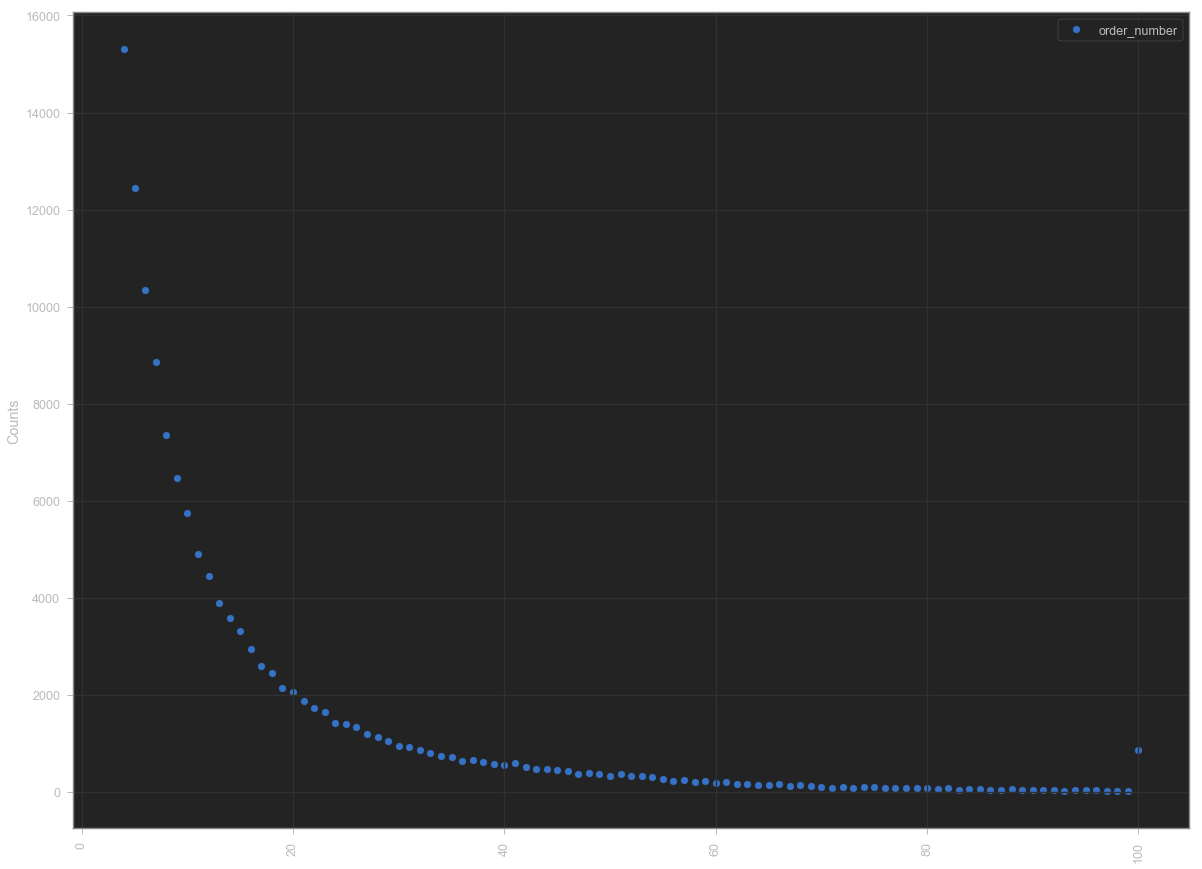

In [187]:
df_prior_orders = df_orders_filtered.groupby(['order_number']).agg(order_number_count=('order_id', 'count')).reset_index()
df_prior_orders.head()
create_scatter_plot(df_prior_orders['order_number'], df_prior_orders['order_number_count'], 'order_number', 'Counts')

Observations:
- There are always at least 3 prior orders in our data for every user.

### Association between time of last order and probability of reorder

,days_since_prior_order,mean_reorder
0,0.0,0.824220
1,1.0,0.615261
2,2.0,0.619692
3,3.0,0.653187
4,4.0,0.675509


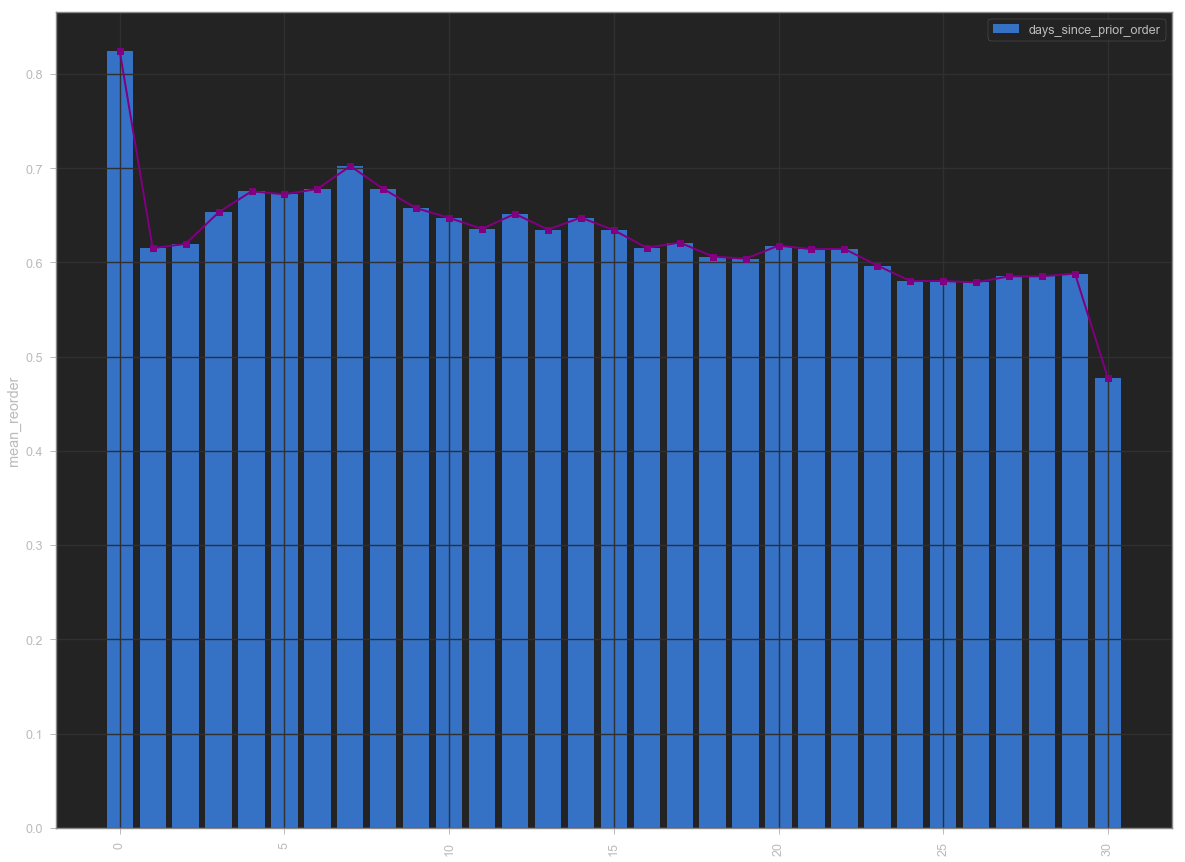

In [188]:
df_grop_prior_order = df_order_products.merge(df_orders, how='left').groupby(['days_since_prior_order'])
df_tmp = df_grop_prior_order.mean()[['reordered']].rename(columns={"reordered": "mean_reorder"}).reset_index()
df_tmp.head()

mean_reorder = df_tmp['mean_reorder'].values
days_since_prior_order = df_tmp['days_since_prior_order'].values
create_bar_chart(days_since_prior_order, mean_reorder, 'days_since_prior_order', 'mean_reorder')

Observations:
    - This is interesting: We can see that if people order again on the same day, they order the same product more often. Whereas when 30 days have passed, they tend to try out new things in their order.

### Association between number of orders and probability of reordering

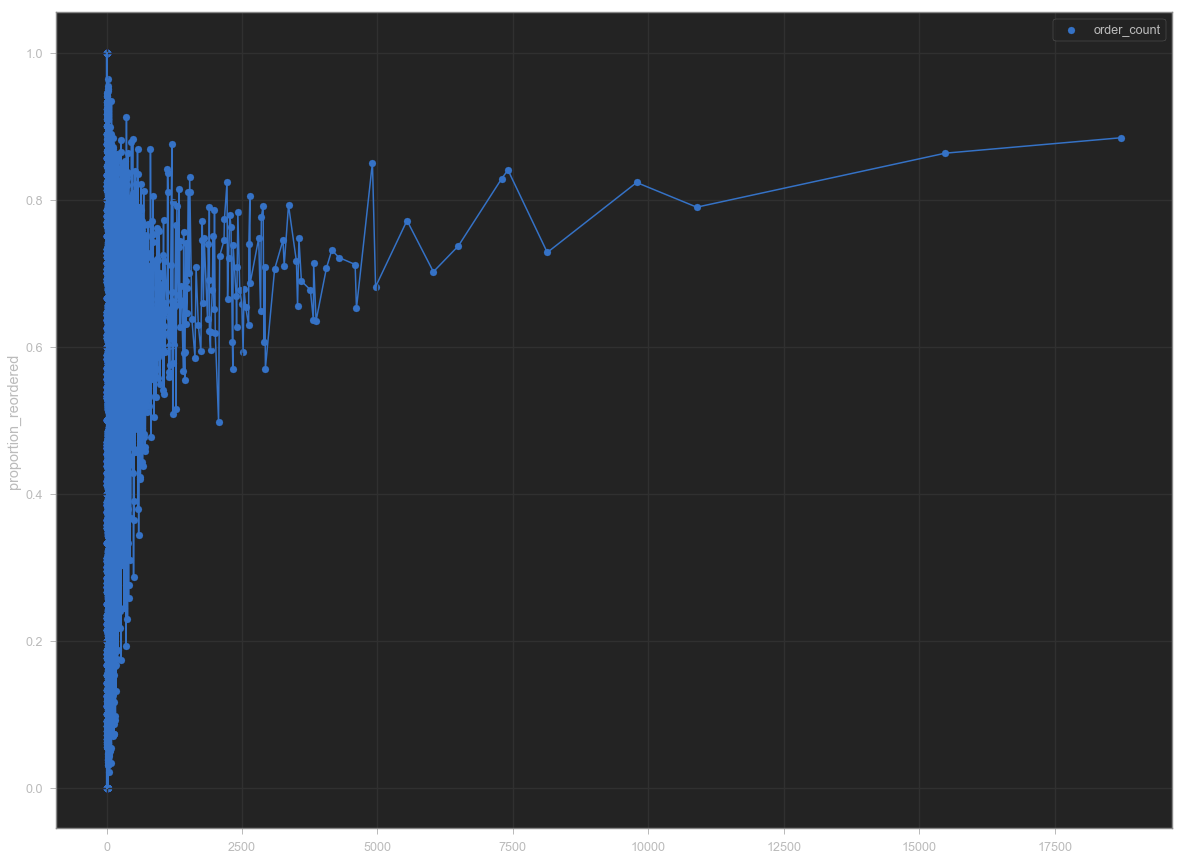

In [189]:
df_group_orders_prod_ids = df_order_products.groupby(['product_id'])
df_tmp = df_group_orders_prod_ids.agg(proportion_reordered=('reordered', 'mean'), order_count=('add_to_cart_order', 'count')).reset_index().sort_values(['order_count'], ascending=False)
df_tmp.head()

plt.scatter(df_tmp['order_count'].values, df_tmp['proportion_reordered'].values, label='order_count')
plt.plot(df_tmp['order_count'].values, df_tmp['proportion_reordered'].values, label='')
plt.legend()
plt.grid()
plt.ylabel("proportion_reordered");

Observations:
    - Products with a high number of orders are naturally more likely to be reordered. However, there seems to be a ceiling effect.

### Organic vs Non-organic

Lets see if we can find any interesting patterns around organic items

#### Feature engineering: 'organic'

We'll create an 'organic' feature that will encode if a product is organic in a boolean space.

In [190]:
df_products['organic'] = df_products.apply(lambda row: 1 if 'organic' in row['product_name'].lower() else 0, axis=1)
df_products.head()

,product_id,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,organic
0,1,Chocolate Sandwich Cookies,61,19,76.0,1852.0,chocolatesandwichcookies_1,0
1,2,All-Seasons Salt,104,13,4.0,90.0,allseasonssalt_2,0
2,3,Robust Golden Unsweetened Oolong Tea,94,7,6.0,277.0,robustgoldenunsweetenedoolongtea_3,0
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,22.0,329.0,smartonesclassicfavoritesminirigatoniwithvodka...,0
4,5,Green Chile Anytime Sauce,5,13,1.0,15.0,greenchileanytimesauce_5,0


In [191]:
# Sanity check to see that the length of the organic product categories adds up to the total number of products
assert df_products.shape[0] == len(df_products.loc[df_products['organic']== 1]) + len(df_products.loc[df_products['organic']== 0])

In [192]:
print('We have: {} organic products in our data.'.format(len(df_products.loc[df_products['organic']== 1])))
print('We have: {} NOT organic products in our data.'.format(len(df_products.loc[df_products['organic']== 0])))
print('Out of: {} total products'.format(df_products.shape[0]))

We have: 5036 organic products in our data.
We have: 44652 NOT organic products in our data.
Out of: 49688 total products


We have many more NOT organic products in our dataset.

In [193]:
df_organic_products = df_order_products.merge(df_products, how='left', on='product_id').groupby(['organic'])
df_organic_products.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,organic
0,1,49302,1,1,Bulgarian Yogurt,120,16,8.0,163.0,bulgarianyogurt_49302,0
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,144.0,4472.0,organic4milkfatwholemilkcottagecheese_11109,1
2,1,10246,3,0,Organic Celery Hearts,83,4,1062.0,23826.0,organicceleryhearts_10246,1
3,1,49683,4,0,Cucumber Kirby,83,4,2413.0,97315.0,cucumberkirby_49683,0
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,24.0,653.0,lightlysmokedsardinesinoliveoil_43633,0
5,1,13176,6,0,Bag of Organic Bananas,24,4,15480.0,379450.0,bagoforganicbananas_13176,1
6,1,47209,7,0,Organic Hass Avocado,24,4,7293.0,213584.0,organichassavocado_47209,1
7,1,22035,8,1,Organic Whole String Cheese,21,16,1993.0,59676.0,organicwholestringcheese_22035,1
8,36,39612,1,0,Grated Pecorino Romano Cheese,2,16,33.0,728.0,gratedpecorinoromanocheese_39612,0
9,36,19660,2,1,Spring Water,115,7,2225.0,56087.0,springwater_19660,0


In [194]:
df_tmp = df_organic_products.count()[['product_id']]
df_tmp = df_tmp.rename(columns={'product_id': 'count'})
df_tmp['proportion'] = df_tmp.apply(lambda row: row['count']/sum(df_tmp['count'].values), axis=1)
df_tmp.head()

,count,proportion
organic,,
0,979000,0.707055
1,405617,0.292945


Observations:
    - Approx 70% of the orders are not organic
    - Approx 30% of the orders are organic
    
People tend in general to order more non organic products with more frequency.

### Reordering organic vs non-organic

Let's reuse the same df_group_order_id that we just created above.

In [195]:
df_organic_products.agg({'add_to_cart_order': 'count', 'reordered': 'mean'}).reset_index().rename(columns={"reordered": "mean_reordered", 'add_to_cart_order': 'count'})

,organic,count,mean_reordered
0,0,979000,0.578498
1,1,405617,0.647098


Observations :
- People more often reorder non organic products vs organic products.

## Exploring Customer Habits
In this section we will explore our customers habits in more detail by making use of the 'prior orders' dataframe. 

### Reordering costumers.

First we will figure out which costumers reorder the same items all the time.
We will look at all the orders excluding the first one where the percentage of reorder is either equal to 1 or to zero. This reorder percentage threshold can be adapted to analyze the data in different ways.

In [196]:
df_reorders = df_order_products_prior.groupby(['order_id']).agg({'add_to_cart_order': 'count', 'reordered': 'mean'}).rename(columns={"reordered": "reorder_mean", 'add_to_cart_order':'order_count'}).reset_index()
# Join with orders that have order_number bigger than 2.
df_reorders = df_reorders.merge(df_orders.loc[df_orders['order_number']>2], how='right', on='order_id')
df_reorders.head()
assert min(df_orders.loc[df_orders['order_number']>2]['order_number'].values) == 3

,order_id,order_count,reorder_mean,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,order_date,week_of_year,product_sequences
0,2,9.0,0.666667,202279,prior,3,5,9,8.0,2016-03-09 09:00:00,10,organiceggwhites_33120 michiganorganickale_289...
1,3,8.0,1.000000,205970,prior,16,5,17,12.0,2016-11-13 17:00:00,45,total2withstrawberrylowfatgreekstrainedyogurt_...
2,4,13.0,0.923077,178520,prior,36,1,9,7.0,2016-11-08 09:00:00,45,plainpreslicedbagels_46842 honeylemoncoughdrop...
3,5,26.0,0.807692,156122,prior,42,6,16,9.0,2016-11-10 16:00:00,45,bagoforganicbananas_13176 justcrispparmesan_15...
4,6,3.0,0.000000,22352,prior,4,1,12,30.0,2016-04-02 12:00:00,13,cleanse_40462 dryersheetsgeraniumscent_15873 c...


In [197]:
def get_users_with_reorder_percentage(dataframe, reorder_percentage):    
    df_tmp = dataframe.loc[(dataframe['eval_set']=='prior') & (df_reorders['reorder_mean'] == reorder_percentage)].groupby(['user_id'])
    df_tmp = df_tmp.agg(n_equal_orders=('reorder_mean', 'sum'), percent_equal= ("order_count", 'count'))
    df_tmp['percent_equal'] = df_tmp.apply(lambda row: row['n_equal_orders']/row['percent_equal'] , axis=1)
    return df_tmp.sort_values(by=['n_equal_orders'], ascending=False)

In [198]:
reorder_percentage = get_users_with_reorder_percentage(df_reorders, 1)
reorder_percentage.head()

,n_equal_orders,percent_equal
user_id,,
99753,97.0,1.0
26489,95.0,1.0
100935,94.0,1.0
17997,94.0,1.0
145481,91.0,1.0


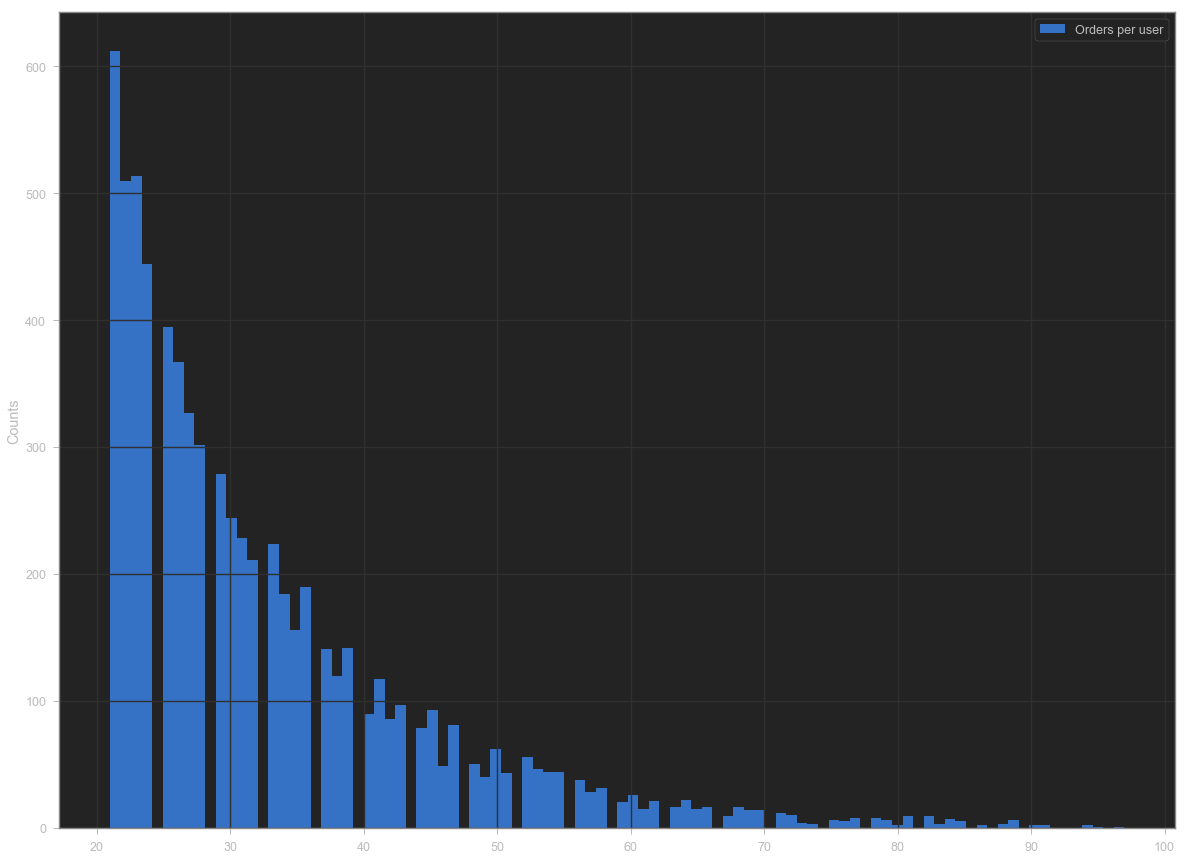

In [199]:
hist_data = reorder_percentage.loc[reorder_percentage['n_equal_orders']>20]['n_equal_orders'].values
bins = np.linspace(hist_data.min(), hist_data.max(), hist_data.max())
create_hist(hist_data, bins, 'Orders per user', 'Counts')

In [177]:
# get_users_with_reorder_percentage(df_reorders, 0.5)

Observations:
- There are costumers that have been replacing the same order more than 90 times! (funny fact)
- The top 3 costumers with the strongest habits are : 99753, 26489 and 100935 respectively.
- There are 109285 that have ordered at least once
- There are 69049 that have never placed exactly the same order.

Lets look more in detail at one of the costumers with strongest habits:


In [178]:
sample_user = 26489
unique_orders = df_reorders.loc[df_reorders['user_id']==sample_user]['order_id'].values
df_tmp = df_order_products_prior[df_order_products_prior['order_id'].isin(unique_orders)].merge(df_products, how='left', on='product_id')
df_tmp.shape
df_tmp.head()
df_tmp = df_tmp.groupby(['product_name']).agg(times_ordered=('product_id', 'count')).sort_values(by=['times_ordered'], ascending=False)
df_tmp.shape
df_tmp.head()

(185, 11)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,organic
0,18583,19677,1,1,Original Pure Creamy Almond Milk,91,16,564.0,14712.0,originalpurecreamyalmondmilk_19677,0
1,103155,19677,1,1,Original Pure Creamy Almond Milk,91,16,564.0,14712.0,originalpurecreamyalmondmilk_19677,0
2,103155,13984,2,1,Organic Mint,16,4,742.0,19745.0,organicmint_13984,1
3,161469,13984,1,1,Organic Mint,16,4,742.0,19745.0,organicmint_13984,1
4,161469,27086,2,1,Half & Half,53,16,2424.0,69217.0,halfhalf_27086,0


(5, 1)

,times_ordered
product_name,
Original Pure Creamy Almond Milk,87
Organic Mint,61
Half & Half,13
Whole Milk,13
Fat Free Milk,11


Observations:
- The user seems to like 'Original Pure Creamy Almond Milk' a lot, he/she has ordered 87 times.

-----

Let's look at this same user on the training data to see if our findings are valid there as well. We could see this as a prediction?

In [179]:
order_id = df_orders.loc[(df_orders['user_id'] == sample_user) & (df_orders['eval_set'] == 'train')]['order_id'].values[0]
print(order_id)
df_tmp = df_order_products_train.loc[df_order_products_train['order_id'] == order_id].merge(df_products, how='left', on='product_id')
df_tmp.head()

445949


,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,organic
0,445949,19677,1,1,Original Pure Creamy Almond Milk,91,16,564.0,14712.0,originalpurecreamyalmondmilk_19677,0
1,445949,13984,2,1,Organic Mint,16,4,742.0,19745.0,organicmint_13984,1


Observations:
- Just as in the testing set the user reoreded the same two top products in the training data.

### Which item do people put into the cart first? 

Let's see what items are currently added to the cart first more frequently.

In [180]:
df_tmp = df_order_products_train.groupby(['product_id', 'add_to_cart_order']).agg(reorder_count=('reordered','count')).reset_index()
df_tmp2 = df_tmp.groupby('product_id').agg(total_reorder_sum=('reorder_count','sum')).reset_index()
df_tmp = df_tmp.merge(df_tmp2, how='left', on='product_id')
df_tmp['percentage'] = df_tmp.apply(lambda row: row['reorder_count']/row['total_reorder_sum'] , axis=1)

df_tmp = df_tmp.loc[(df_tmp['reorder_count']>10)]
df_tmp = df_tmp.merge(df_products, how='left', on='product_id').merge(df_departments, how='left', on='department_id')
df_tmp = df_tmp.sort_values(by=['percentage'], ascending=False)

df_tmp.head(10)

,product_id,add_to_cart_order,reorder_count,total_reorder_sum,percentage,product_name,aisle_id,department_id,orders_per_product_train,orders_per_product_prior,product_name_encoded,organic,department,orders_per_department_train,orders_per_department_prior
19241,45004,1,39,59,0.661017,White Multifold Towels,54,17,59.0,1531.0,whitemultifoldtowels_45004,0,household,35986,738666
4840,11885,1,41,69,0.594203,"Sparkling Water, Bottles",115,7,69.0,1556.0,sparklingwaterbottles_11885,0,beverages,114046,2690129
5323,13128,1,12,21,0.571429,Purified Alkalkine Water with Minerals pH10,115,7,21.0,728.0,purifiedalkalkinewaterwithmineralsph10_13128,0,beverages,114046,2690129
1400,4100,1,14,25,0.560000,Organic Dark Roast,26,7,25.0,419.0,organicdarkroast_4100,1,beverages,114046,2690129
606,1729,1,48,92,0.521739,2% Lactose Free Milk,84,16,92.0,1762.0,2lactosefreemilk_1729,0,dairy eggs,217051,5414016
2721,6729,1,35,72,0.486111,Cookie Tray,8,3,72.0,1209.0,cookietray_6729,0,bakery,48394,1176787
3781,9285,1,13,27,0.481481,Boneless Pork Shoulder Butt,7,12,27.0,565.0,bonelessporkshoulderbutt_9285,0,meat seafood,30307,708931
2744,6848,1,12,26,0.461538,Party Tumblers,111,17,26.0,376.0,partytumblers_6848,0,household,35986,738666
5147,12640,1,12,26,0.461538,Sport Bottle with Flip Cap Natural Spring Water,115,7,26.0,490.0,sportbottlewithflipcapnaturalspringwater_12640,0,beverages,114046,2690129
11252,26405,1,47,105,0.447619,XL Pick-A-Size Paper Towel Rolls,54,17,105.0,1214.0,xlpickasizepapertowelrolls_26405,0,household,35986,738666


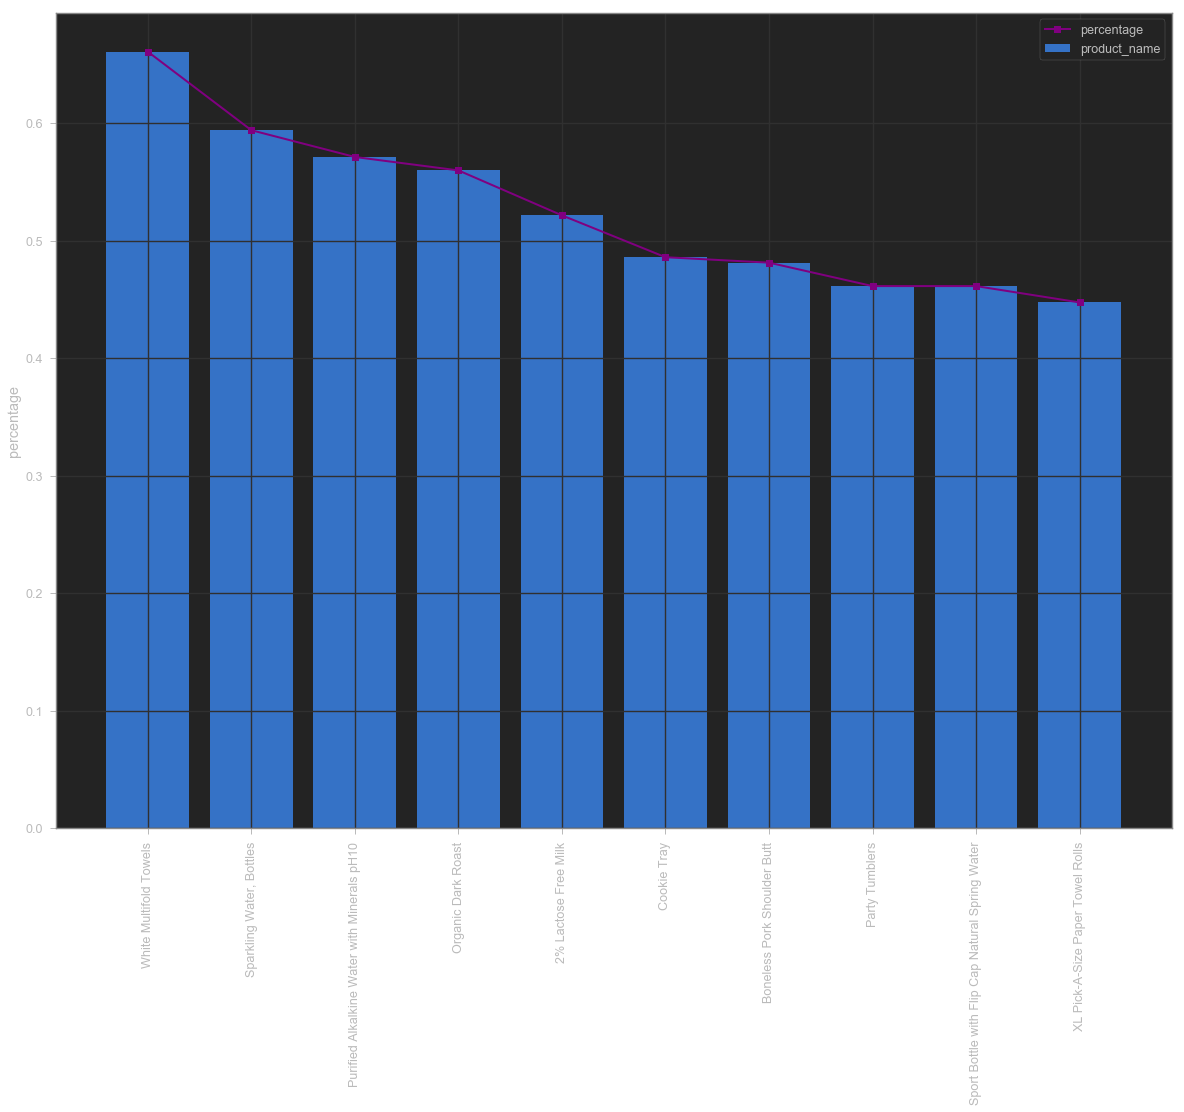

In [181]:
create_bar_chart(df_tmp[df_tmp['add_to_cart_order'] == 1]['product_name'][:10], df_tmp[df_tmp['add_to_cart_order'] == 1]['percentage'][:10], 'product_name', 'percentage')

Observations:
- The first item that is put in the cart is : White Multifold Towels. (funny fact)
- Would be interesting to do this per user group after finding the most similar users

### Add to cart sequence

In this section we will explore the 'Add to cart sequence' that users follow for each specific product category

In [182]:
df_tmp2 = df_tmp.groupby(['add_to_cart_order', 'department']).agg(count=('product_id', 'count')).reset_index()
df_tmp2 = df_tmp2.sort_values(by=['count'], ascending=False)

df_best_selling_departments = df_tmp2.groupby('department').agg(total_count=('count', 'sum')).reset_index()
df_best_selling_departments = df_best_selling_departments.sort_values(by=['total_count'], ascending=False)
df_best_selling_departments.head(10)

,department,total_count
19,produce,5670
7,dairy eggs,4331
20,snacks,1910
3,beverages,1804
10,frozen,1592
16,pantry,1107
2,bakery,911
8,deli,800
6,canned goods,745
9,dry goods pasta,643


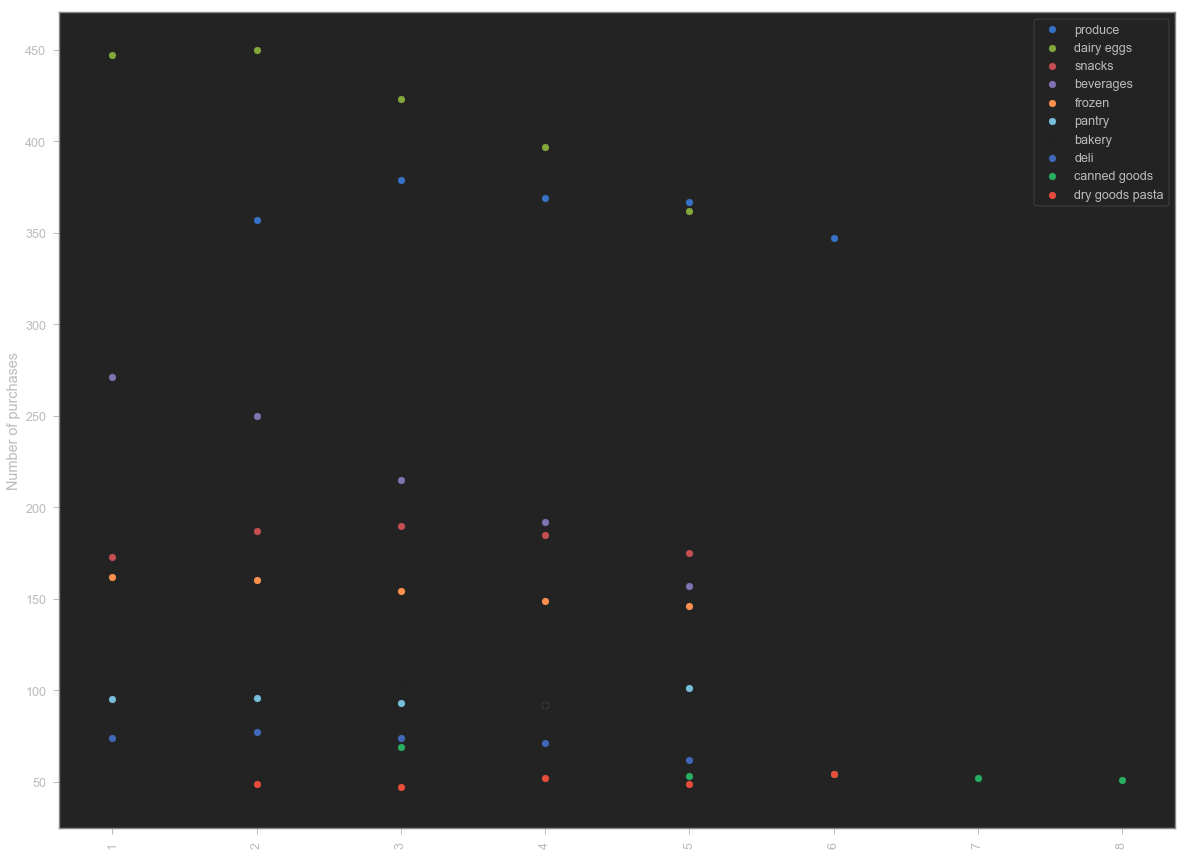

In [183]:
for department in df_best_selling_departments['department'].values[:10]:
    df_tmp3 = df_tmp2[df_tmp2['department']==department][:5].sort_values(by=['add_to_cart_order'], ascending=True)
    create_scatter_plot(df_tmp3['add_to_cart_order'], df_tmp3['count'], department, 'Number of purchases')

Observations:
- We observe the list of best selling departments
- The items from the top 4 departments that are added to the basket are: dairy eggs → produce → beverages → snacks 
- It isn't until the 5th pick that snacks overtake beverages as the 3rd pick.

### Products that are usually bought together

In this section we will build a mechanism (PDF) that will return the products that are most likely to be bought alongside a specific product for a specific user. This will help us build our recommender system.

In [ ]:
def get_order_ids_for_product(product_id, dataframe, user_id):
    if user_id is not None:
        df_tmp = dataframe[dataframe['user_id']==user_id]
        df_tmp = df_tmp[df_tmp['product_id']==product_id]
    else:
        df_tmp = dataframe[dataframe['product_id']==product_id]
    return list(df_tmp['order_id'].values)

def get_product_ids_for_order_list(order_ids_for_product):
    related_products = []
    for order_id in order_ids_for_product:
        df_tmp = df_order_products_train[df_order_products_train['order_id']==order_id]
        related_products = related_products + list(df_tmp['product_id'].values)
    return related_products
